<h1> <center>House Pricing Prediction - Assignment Solution <center></h1>

The solution is divided into the following sections: 
1. Importing Data
2. Inspecting the Dataframe
3. Data Preparation and looking at correlations
4. Test-Train Split and Feature Scaling
5. Model building and evaluation


### 1. Importing Data

Let's understand the dataset.

In [1]:
# Lets import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing_dataset = pd.read_csv("train.csv")
housing_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Inspecting the Dataframe

In [3]:
# Lets check the size of the dataset
housing_dataset.shape

(1460, 81)

In [4]:
# Lets check the info regarding the dataset
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Describing the numerical data
housing_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3. Data Preparation and looking at correlations

In [6]:
# Dropping 'Id' columns as this is index column, and we do not need it
housing_dataset.drop(['Id'], axis=1, inplace=True)

In [7]:
# After going through the column types, it is observed that many of the column types are not identified correctly by pandas.
# Passing a dictionary to astype() function to correct such columns
housing_dataset = housing_dataset.astype({
    "MSSubClass":'category',
    "YearBuilt": 'category',
    "MoSold" : 'category',
    "YrSold" : 'category'
})

# Not categorizing 'OverallQual' and  'OverallCond' columns as categories, as they contain numeric ordered values.

In [8]:
# It is observed that 'NA' is one of the level of many categorical columns, so modifying it accordingly based on type 
# of the column
housing_dataset["Alley"] = housing_dataset["Alley"].replace(np.nan, 'No_Alley_Access')
housing_dataset["FireplaceQu"] = housing_dataset["FireplaceQu"].replace(np.nan, 'No_Fireplace')
housing_dataset["GarageType"] = housing_dataset["GarageType"].replace(np.nan, 'No_Garage')
housing_dataset["GarageFinish"] = housing_dataset["GarageFinish"].replace(np.nan, 'No_Garage')
housing_dataset["GarageQual"] = housing_dataset["GarageQual"].replace(np.nan, 'No_Garage')
housing_dataset["GarageCond"] = housing_dataset["GarageCond"].replace(np.nan, 'No_Garage')
housing_dataset["PoolQC"] = housing_dataset["PoolQC"].replace(np.nan, 'No_Pool')
housing_dataset["Fence"] = housing_dataset["Fence"].replace(np.nan, 'No_Fence')
housing_dataset["MiscFeature"] = housing_dataset["MiscFeature"].replace(np.nan, 'No_MiscFeature')
housing_dataset["BsmtQual"] = housing_dataset["BsmtQual"].replace(np.nan, 'No_Basement')
housing_dataset["BsmtCond"] = housing_dataset["BsmtCond"].replace(np.nan, 'No_Basement')
housing_dataset["BsmtExposure"] = housing_dataset["BsmtExposure"].replace(np.nan, 'No_Basement')
housing_dataset["BsmtFinType1"] = housing_dataset["BsmtFinType1"].replace(np.nan, 'No_Basement')
housing_dataset["BsmtFinType2"] = housing_dataset["BsmtFinType2"].replace(np.nan, 'No_Basement')                  

In [9]:
# Creating a new column based on "YearBuilt", "YearRemodAdd".
# We can flag such houses where Remodeling was done
# Defining a function to map the values 
def calculate_whether_house_was_remodelled(row): 
    if row["YearBuilt"] >= row["YearRemodAdd"]:
        return "No"
    else:
        return "Yes"
    
housing_dataset["Whether_House_was_modified"] = housing_dataset.apply(
    lambda row : calculate_whether_house_was_remodelled(row),axis = 1)

housing_dataset[["YearBuilt", "YearRemodAdd", "Whether_House_was_modified"]].head(10)

,YearBuilt,YearRemodAdd,Whether_House_was_modified
0,2003,2003,No
1,1976,1976,No
2,2001,2002,Yes
3,1915,1970,Yes
4,2000,2000,No
5,1993,1995,Yes
6,2004,2005,Yes
7,1973,1973,No
8,1931,1950,Yes
9,1939,1950,Yes


In [10]:
# Creating a new column which identifies age of the house before its sold off
# Defining a function to identify the age
def calculate_age_of_house(row): 
    return row["YrSold"] - row["YearBuilt"]
    
housing_dataset["House_Age"] = housing_dataset.apply(
    lambda row : calculate_age_of_house(row),axis = 1)

housing_dataset[["YearBuilt", "YrSold", "House_Age"]].head(10)

,YearBuilt,YrSold,House_Age
0,2003,2008,5
1,1976,2007,31
2,2001,2008,7
3,1915,2006,91
4,2000,2008,8
5,1993,2009,16
6,2004,2007,3
7,1973,2009,36
8,1931,2008,77
9,1939,2008,69


In [11]:
# Creating a new column which identifies age of the Garage before its sold off
# Defining a function to identify the age of it
def calculate_age_of_garage(row):
    if row["GarageYrBlt"] == np.nan or pd.isnull(row["GarageYrBlt"]):
        return "No Garage"
    elif row["YrSold"] - row["GarageYrBlt"] > 5:
        return "More then 5 years"
    else:
        return "Less then or equal to 5 years"
    
housing_dataset["Garage_Age"] = housing_dataset.apply(
    lambda row : calculate_age_of_garage(row),axis = 1)

housing_dataset[["GarageYrBlt", "YrSold", "Garage_Age", "House_Age"]].head(10)

,GarageYrBlt,YrSold,Garage_Age,House_Age
0,2003.0,2008,Less then or equal to 5 years,5
1,1976.0,2007,More then 5 years,31
2,2001.0,2008,More then 5 years,7
3,1998.0,2006,More then 5 years,91
4,2000.0,2008,More then 5 years,8
5,1993.0,2009,More then 5 years,16
6,2004.0,2007,Less then or equal to 5 years,3
7,1973.0,2009,More then 5 years,36
8,1931.0,2008,More then 5 years,77
9,1939.0,2008,More then 5 years,69


In [12]:
# Dropping year columns since we have derived new columns from them
housing_dataset.drop(["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"], axis=1, inplace=True)

In [13]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass                    1460 non-null category
MSZoning                      1460 non-null object
LotFrontage                   1201 non-null float64
LotArea                       1460 non-null int64
Street                        1460 non-null object
Alley                         1460 non-null object
LotShape                      1460 non-null object
LandContour                   1460 non-null object
Utilities                     1460 non-null object
LotConfig                     1460 non-null object
LandSlope                     1460 non-null object
Neighborhood                  1460 non-null object
Condition1                    1460 non-null object
Condition2                    1460 non-null object
BldgType                      1460 non-null object
HouseStyle                    1460 non-null object
OverallQual                   1460 non-null int64
OverallCond              

In [14]:
# Lets change the 'object' type to 'Category'
for col in housing_dataset.columns:
    if housing_dataset[col].dtype == "object":
        housing_dataset[col] = housing_dataset[col].astype("category")

In [15]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass                    1460 non-null category
MSZoning                      1460 non-null category
LotFrontage                   1201 non-null float64
LotArea                       1460 non-null int64
Street                        1460 non-null category
Alley                         1460 non-null category
LotShape                      1460 non-null category
LandContour                   1460 non-null category
Utilities                     1460 non-null category
LotConfig                     1460 non-null category
LandSlope                     1460 non-null category
Neighborhood                  1460 non-null category
Condition1                    1460 non-null category
Condition2                    1460 non-null category
BldgType                      1460 non-null category
HouseStyle                    1460 non-null category
OverallQual                   1460 non-null int64

In [16]:
# Lets check the levels of all the categorical columns, and verify that those matches with present in data description
from pandas.api.types import is_numeric_dtype

for col in housing_dataset.columns:
    if not is_numeric_dtype(housing_dataset[col]):
        print("Col is", col)
        print(housing_dataset[col].value_counts())
        print("##################################")

Col is MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
##################################
Col is MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################
Col is Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################
Col is Alley
No_Alley_Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64
##################################
Col is LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################
Col is LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################
Col is Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
########

In [17]:
# Column levels of following columns is consistent across that column.
# Since this is no variation in the column value, these columns are dropped
housing_dataset.drop(["Street", "Utilities", "PoolQC", "RoofMatl", "Heating", "Condition2"], inplace=True, axis=1)

### Null value imputation process

In [18]:
# Checking the shape of the dataset before doing null value imputation process
housing_dataset.shape

(1460, 73)

In [19]:
# Percentage of null values present in each column of dataset
round(100*(housing_dataset.isnull().sum()/len(housing_dataset.index)), 2)

MSSubClass                     0.00
MSZoning                       0.00
LotFrontage                   17.74
LotArea                        0.00
Alley                          0.00
LotShape                       0.00
LandContour                    0.00
LotConfig                      0.00
LandSlope                      0.00
Neighborhood                   0.00
Condition1                     0.00
BldgType                       0.00
HouseStyle                     0.00
OverallQual                    0.00
OverallCond                    0.00
RoofStyle                      0.00
Exterior1st                    0.00
Exterior2nd                    0.00
MasVnrType                     0.55
MasVnrArea                     0.55
ExterQual                      0.00
ExterCond                      0.00
Foundation                     0.00
BsmtQual                       0.00
BsmtCond                       0.00
BsmtExposure                   0.00
BsmtFinType1                   0.00
BsmtFinSF1                  

In [20]:
# Imputing null values from 'LotFrontage' column with mean of the column
# we are replacing it with mean, so that we dont lose rows of the dataset, as those are less
housing_dataset.loc[np.isnan(housing_dataset["LotFrontage"]), ["LotFrontage"]] = housing_dataset["LotFrontage"].mean()

# Imputing null values from 'MasVnrArea' column with mean of the column
housing_dataset.loc[pd.isnull(housing_dataset["MasVnrArea"]), ["MasVnrArea"]] = housing_dataset["MasVnrArea"].mean()

In [21]:
# Imputing null values from 'MasVnrType' column with Median of the column, and that is"None"
housing_dataset.loc[pd.isnull(housing_dataset["MasVnrType"]), ["MasVnrType"]] = "None"

# Imputing null values from 'Electrical' column with Median of the column, and that is"SBrkr"
housing_dataset.loc[pd.isnull(housing_dataset["Electrical"]), ["Electrical"]] = "SBrkr"

In [22]:
# Actual number of rows where null value is present
housing_dataset[housing_dataset.isnull().sum(axis=1) > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Whether_House_was_modified,House_Age,Garage_Age


In [23]:
# Removing the row with any missing value
housing_dataset = housing_dataset[housing_dataset.isnull().sum(axis=1) == 0]
# Actual number of rows where null value is present
housing_dataset[housing_dataset.isnull().sum(axis=1) > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Whether_House_was_modified,House_Age,Garage_Age


In [24]:
# Actual columns which contain any null values
housing_dataset.columns[housing_dataset.isna().any()].tolist()

[]

In [25]:
# Percentage of null values present in each column of dataset
round(100*(housing_dataset.isnull().sum()/len(housing_dataset.index)), 2)

MSSubClass                    0.0
MSZoning                      0.0
LotFrontage                   0.0
LotArea                       0.0
Alley                         0.0
LotShape                      0.0
LandContour                   0.0
LotConfig                     0.0
LandSlope                     0.0
Neighborhood                  0.0
Condition1                    0.0
BldgType                      0.0
HouseStyle                    0.0
OverallQual                   0.0
OverallCond                   0.0
RoofStyle                     0.0
Exterior1st                   0.0
Exterior2nd                   0.0
MasVnrType                    0.0
MasVnrArea                    0.0
ExterQual                     0.0
ExterCond                     0.0
Foundation                    0.0
BsmtQual                      0.0
BsmtCond                      0.0
BsmtExposure                  0.0
BsmtFinType1                  0.0
BsmtFinSF1                    0.0
BsmtFinType2                  0.0
BsmtFinSF2    

In [26]:
# Checking the shape of the dataset after null value imputation process
housing_dataset.shape

(1460, 73)

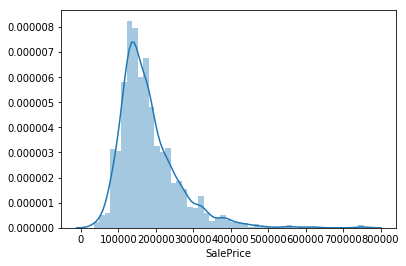

In [27]:
### Checking the distribution of the "SalePrice" column as it is our independent variable
sns.distplot(housing_dataset['SalePrice'])
plt.show()

In [28]:
#Lets measure the skewness
print("The skewness of SalePrice is {}".format(housing_dataset['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


Skewness is 0.12133506220520406


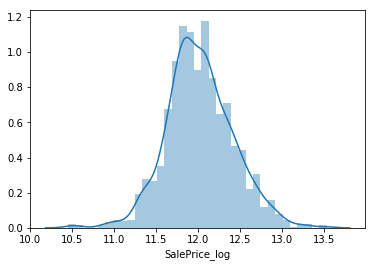

In [29]:
#Transforming the SalePrice variable
housing_dataset["SalePrice_log"] = np.log(housing_dataset['SalePrice'])
print ('Skewness is', housing_dataset["SalePrice_log"].skew())
sns.distplot(housing_dataset["SalePrice_log"])

In [30]:
# Since we have derived a new variable, we are dropping existing independent variable
housing_dataset.drop(["SalePrice"], axis=1, inplace=True)

### Plotting categorical columns

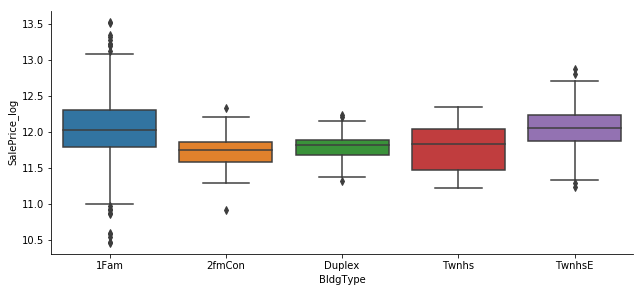

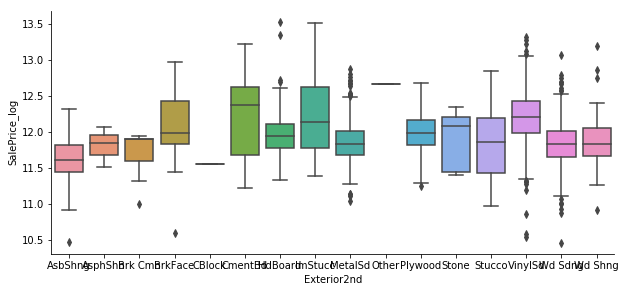

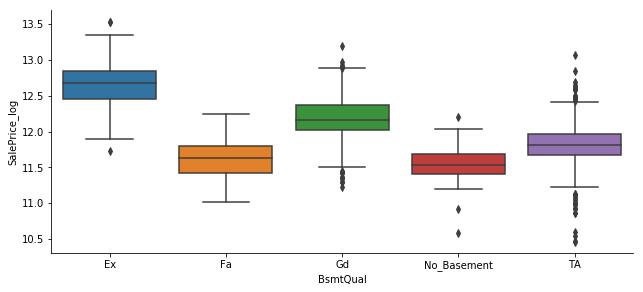

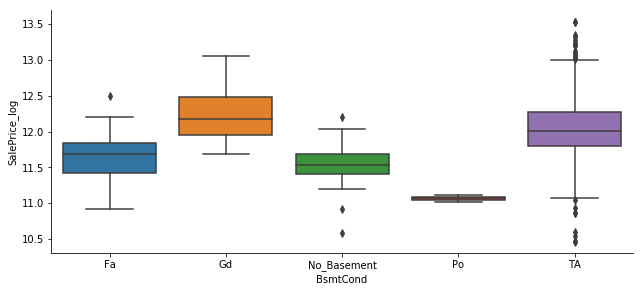

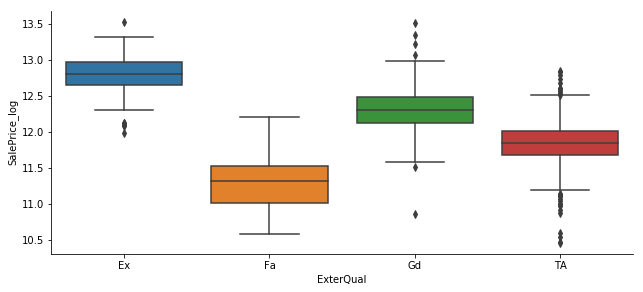

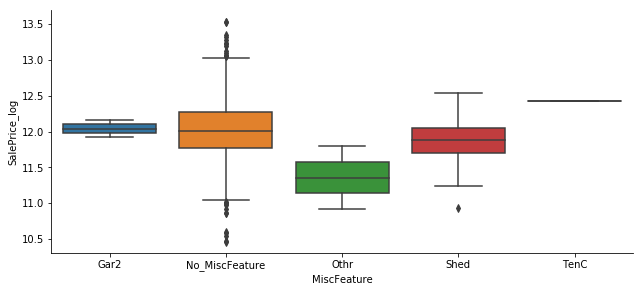

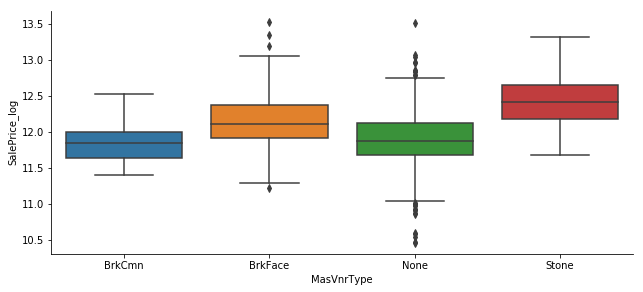

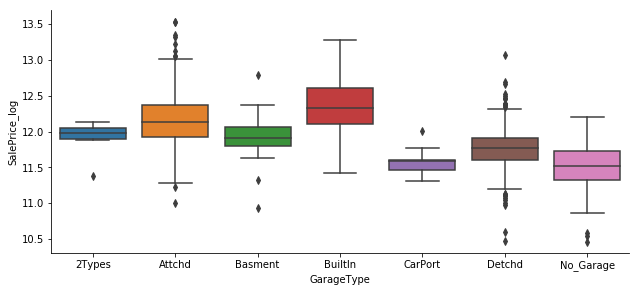

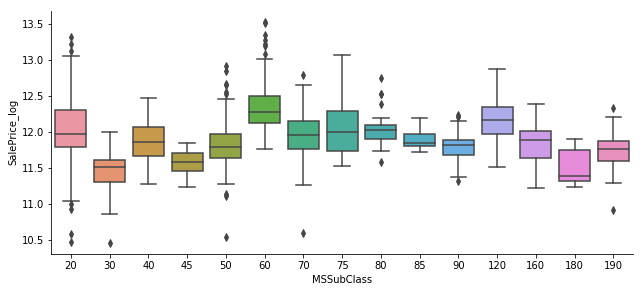

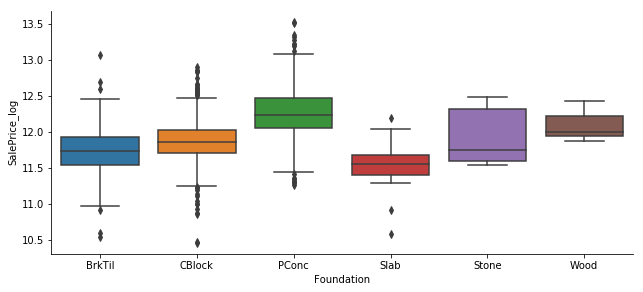

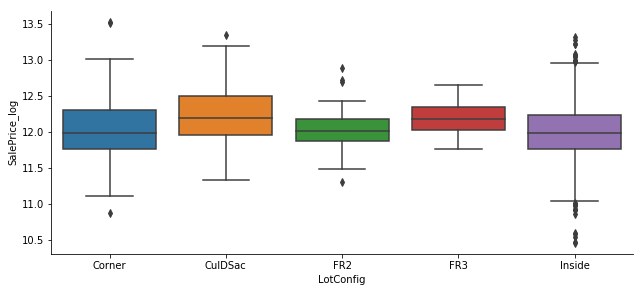

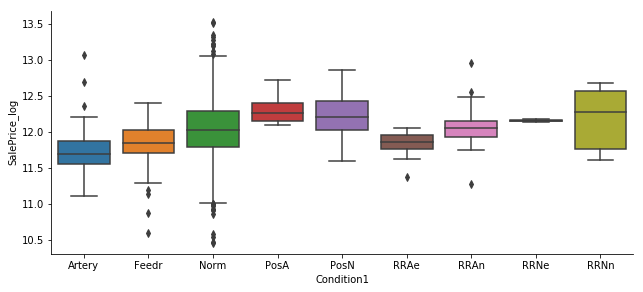

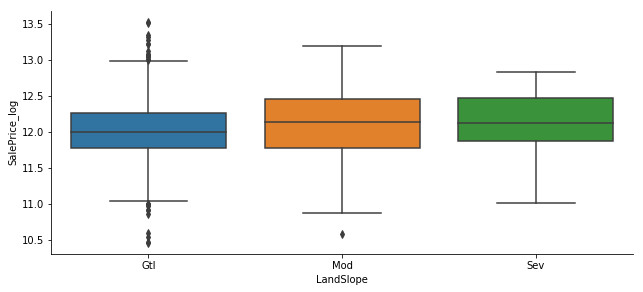

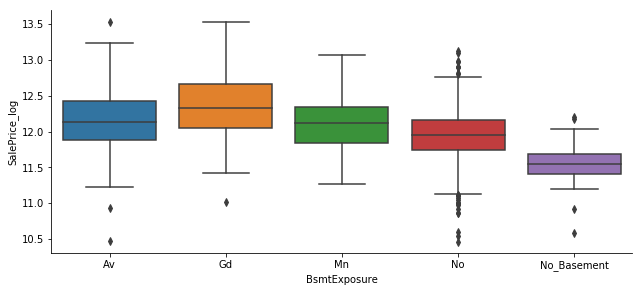

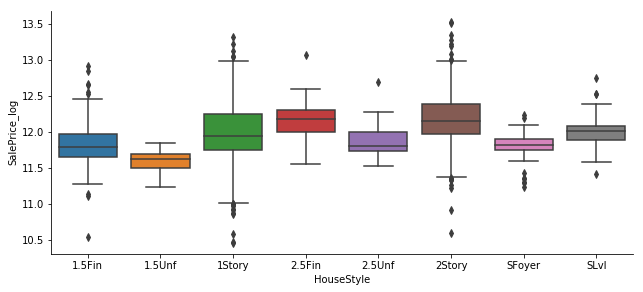

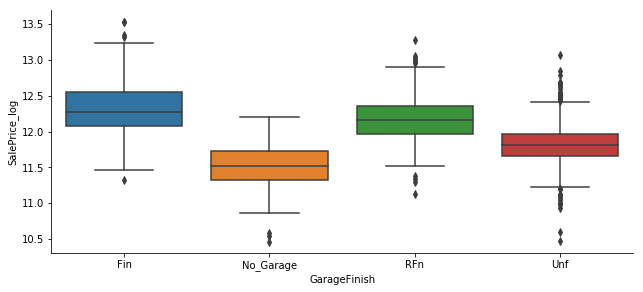

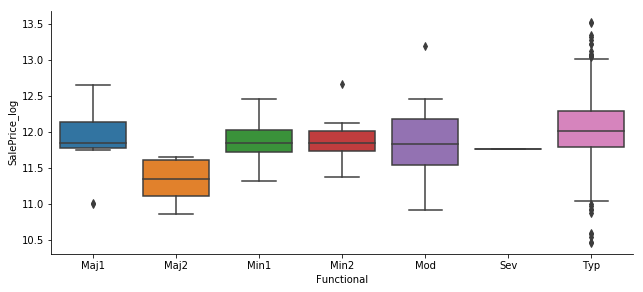

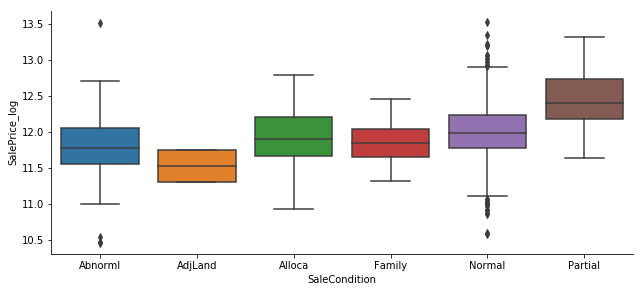

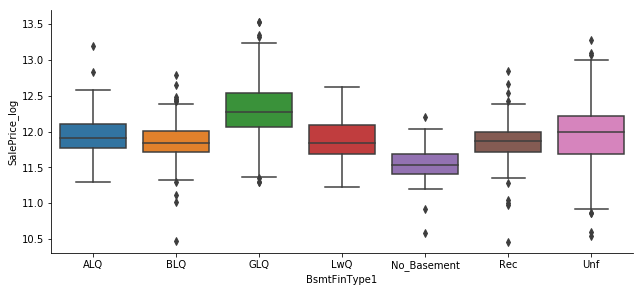

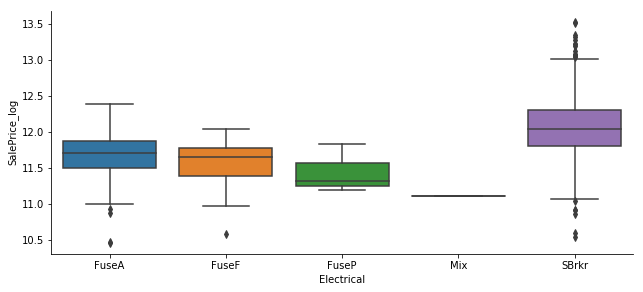

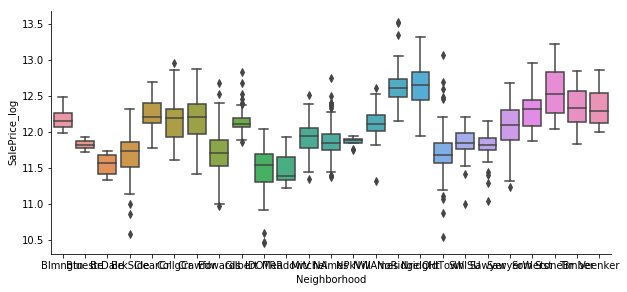

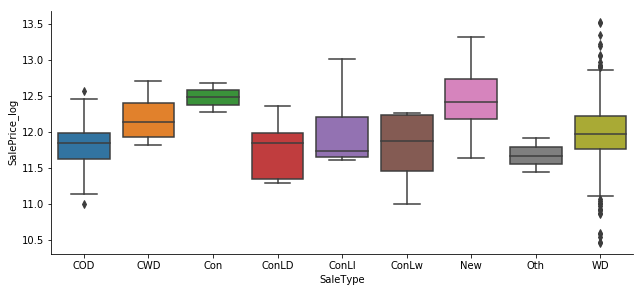

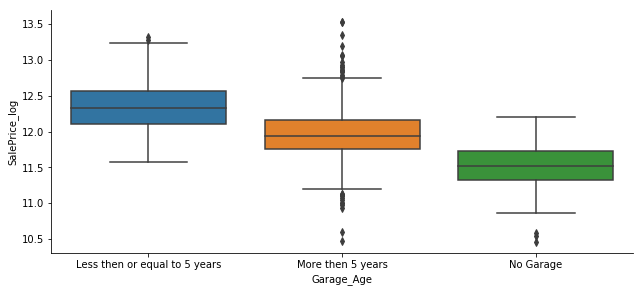

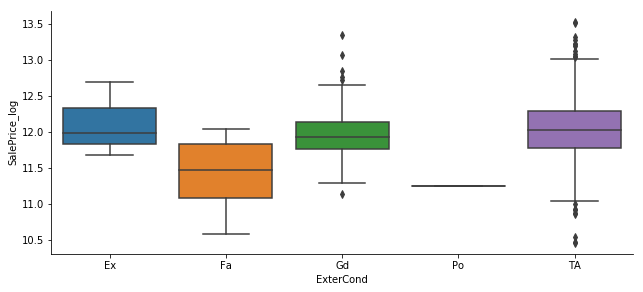

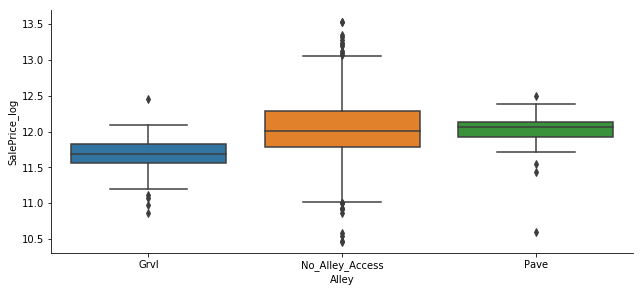

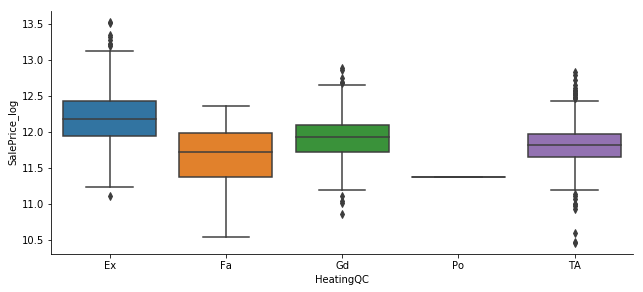

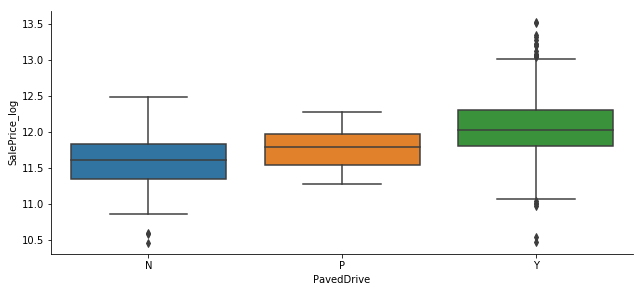

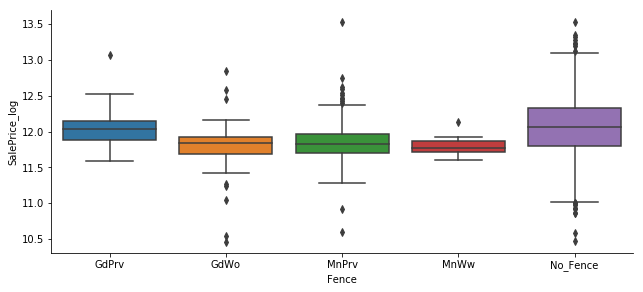

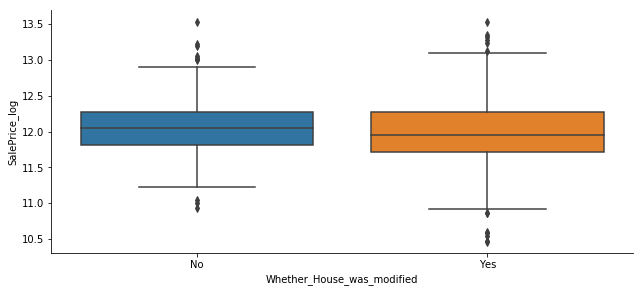

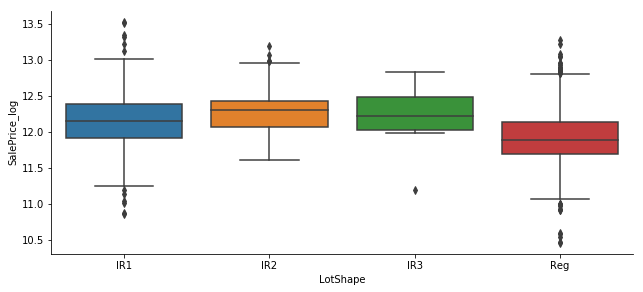

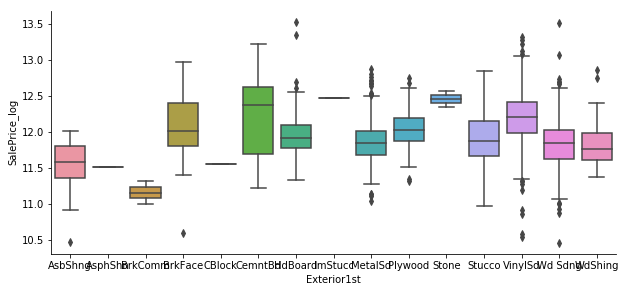

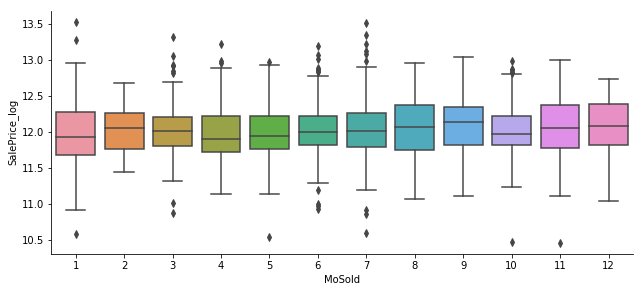

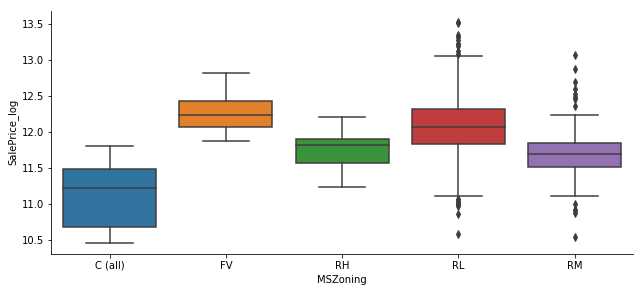

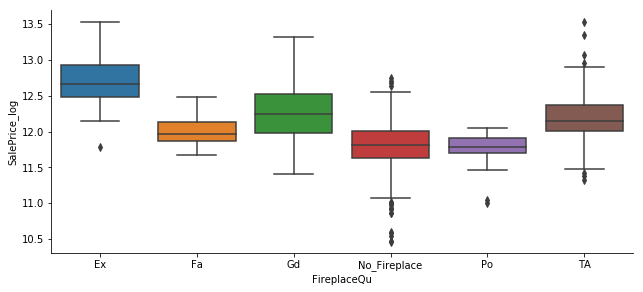

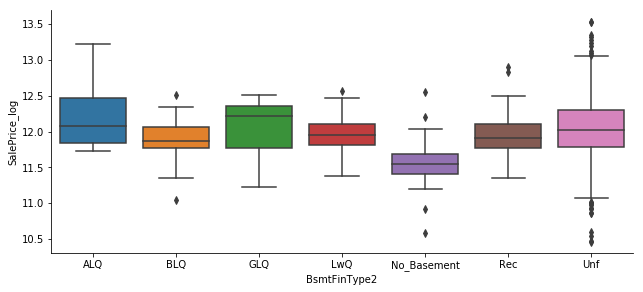

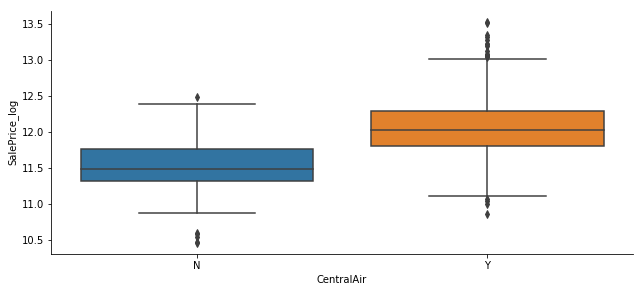

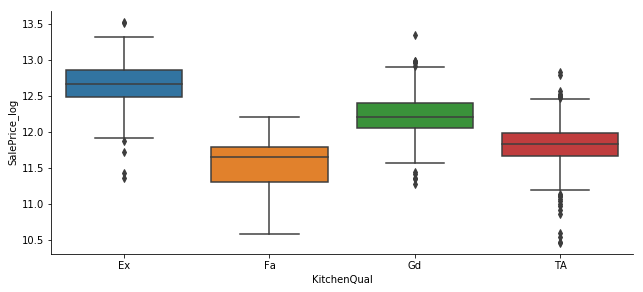

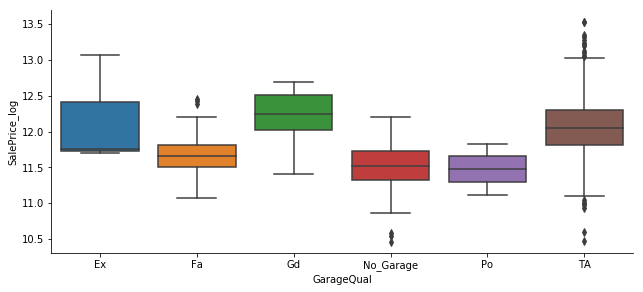

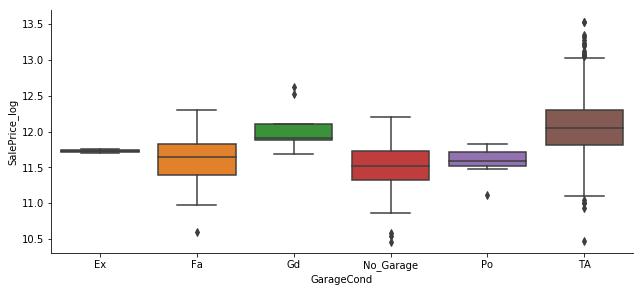

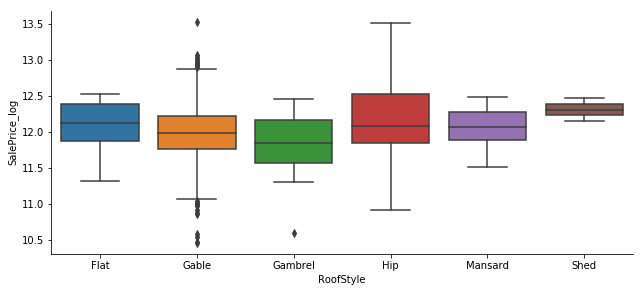

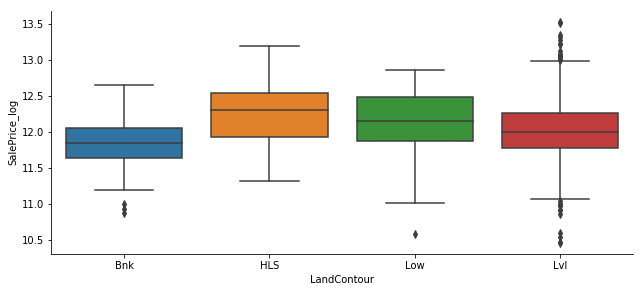

In [31]:
## Lets re-calculate categorically variables post our data cleaning steps
all_columns = housing_dataset.columns
numeric_cols = list(housing_dataset._get_numeric_data().columns)
categorical_cols = list(set(all_columns) - set(numeric_cols))

# Lets visualise categorical data across SalePrice column
# Lets try to find out which value of which categorical column is highly correlated to 'Converted' (output) column
for col in categorical_cols:
    g = sns.catplot(x=col, y="SalePrice_log", kind="box", data=housing_dataset)
    g.fig.set_size_inches(10,4)


### Plotting Numerical columns

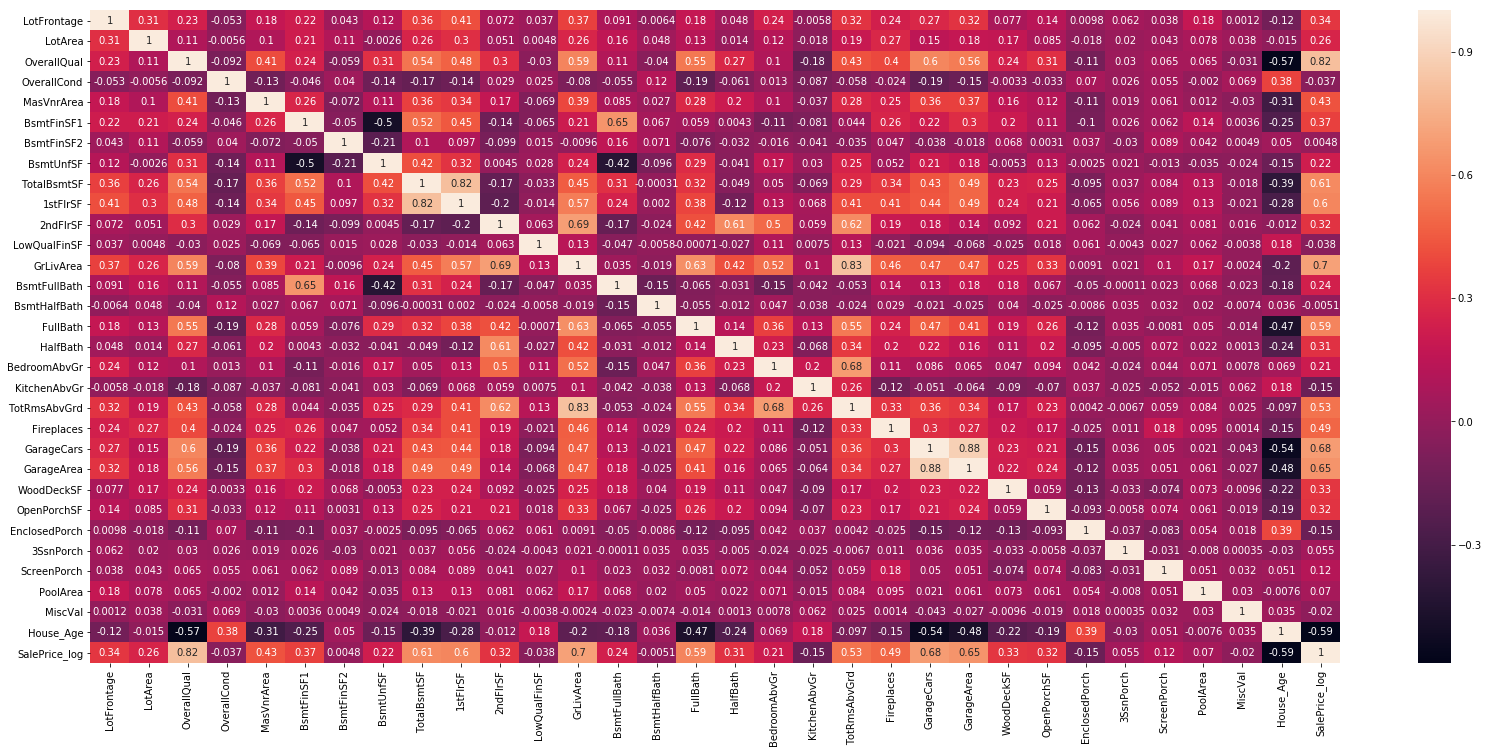

In [32]:
# Above figure provides important details on how categorical columns levels affect Sales Price
# E.g. If Central Air is present in House, then its price is much more then house where it is not present
# Checking the correlations of various numeric variables
plt.figure(figsize=(28,12))
sns.heatmap(housing_dataset.corr(), annot=True)
plt.show()

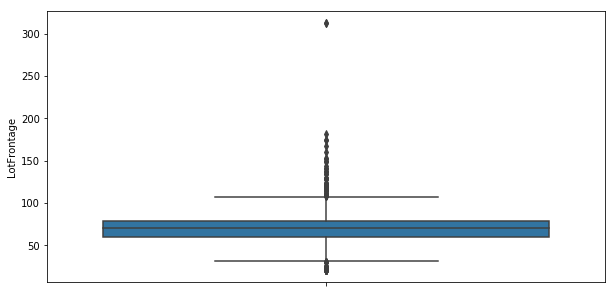

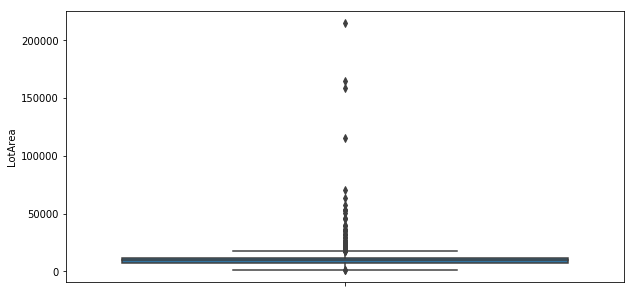

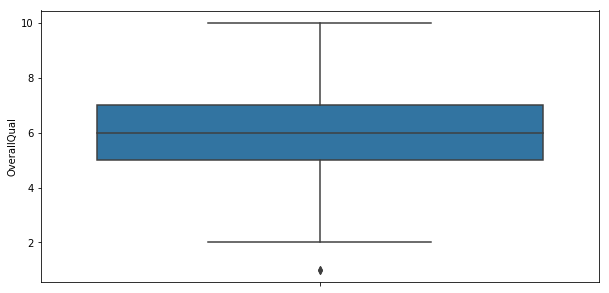

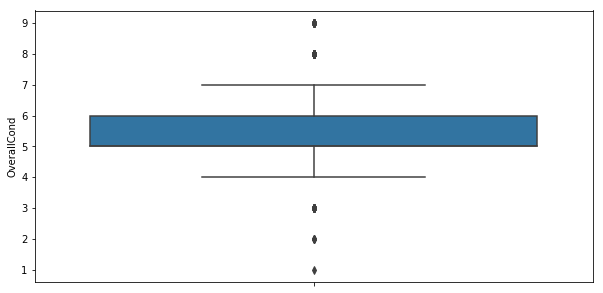

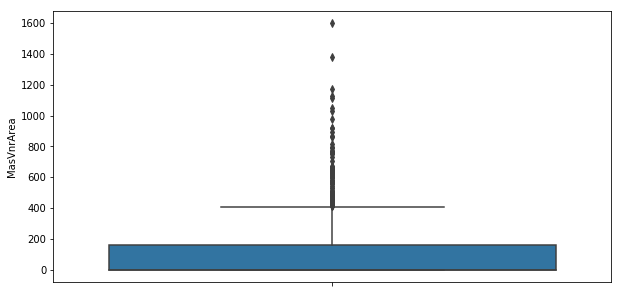

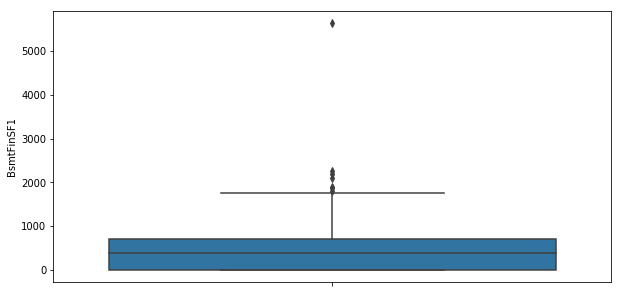

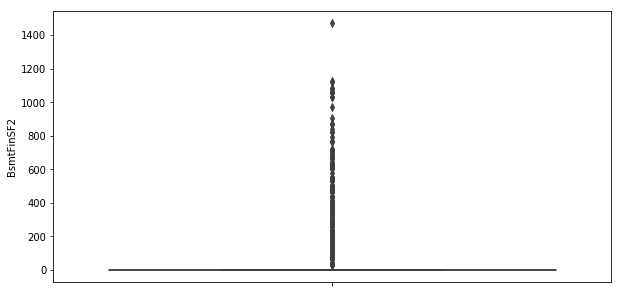

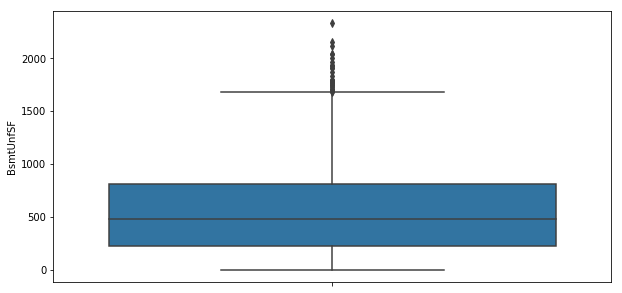

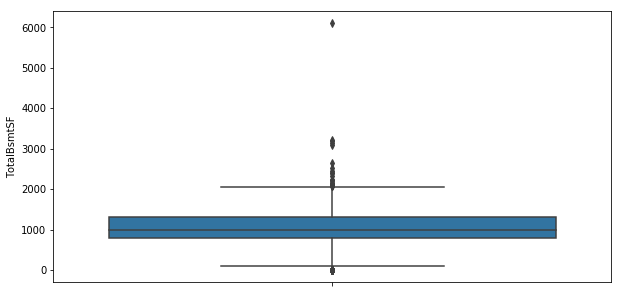

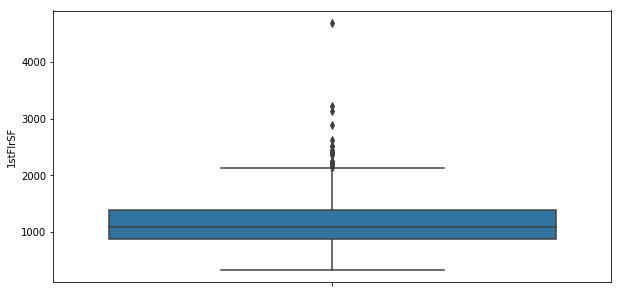

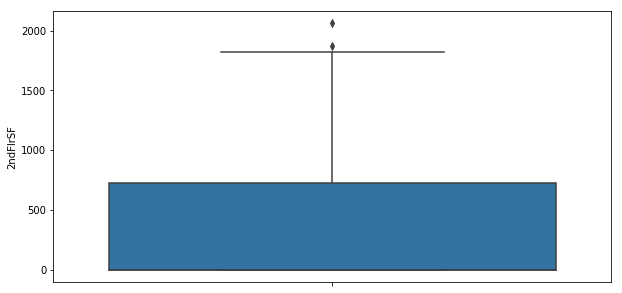

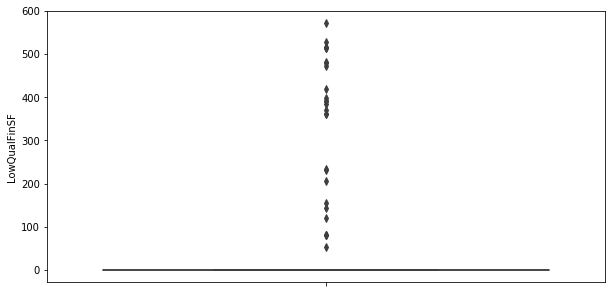

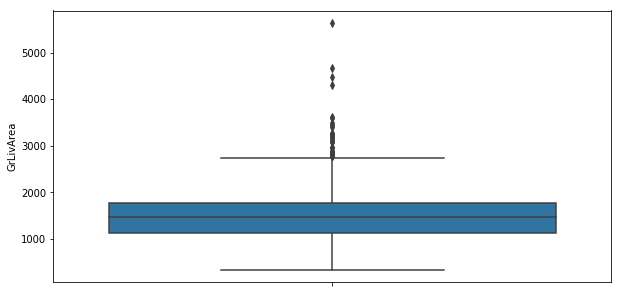

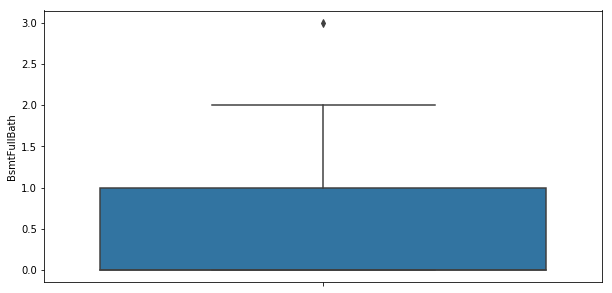

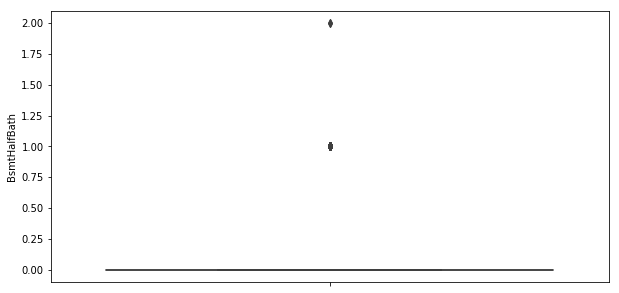

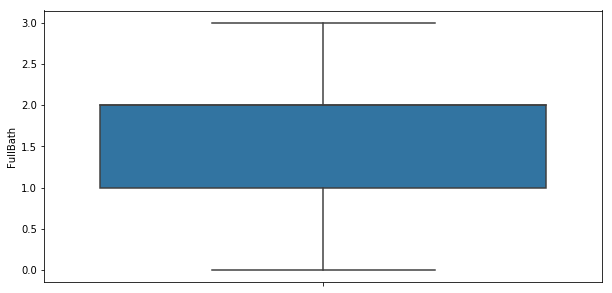

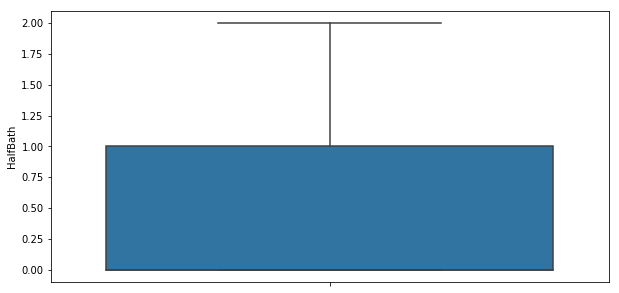

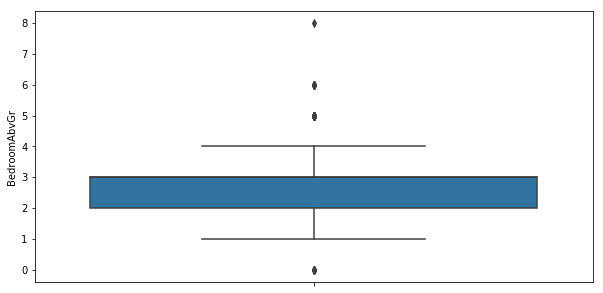

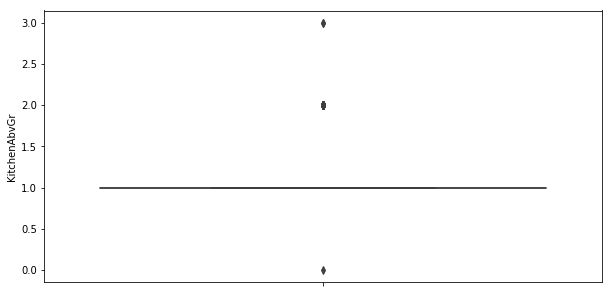

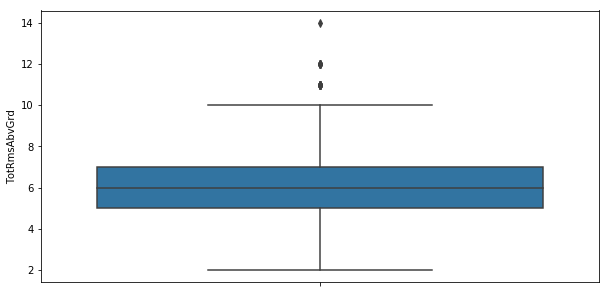

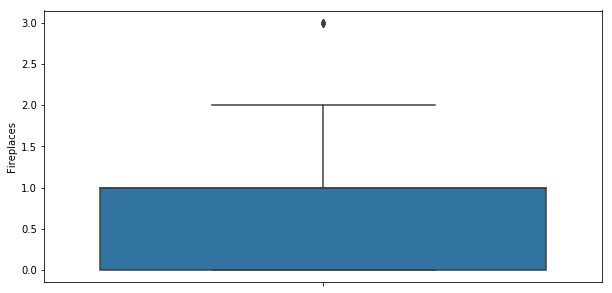

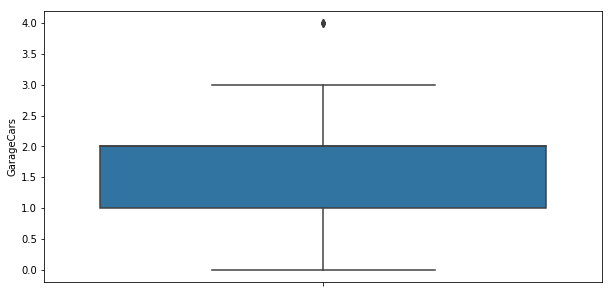

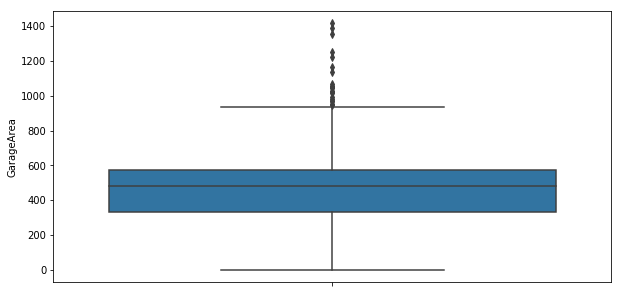

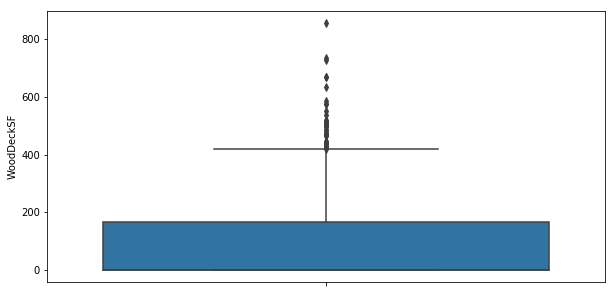

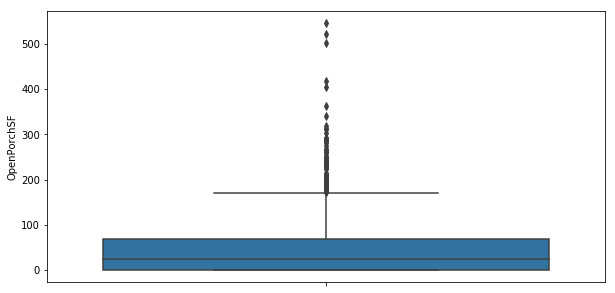

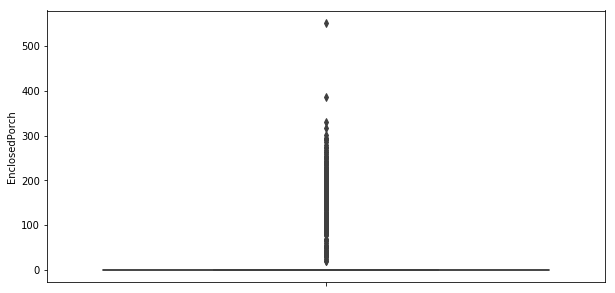

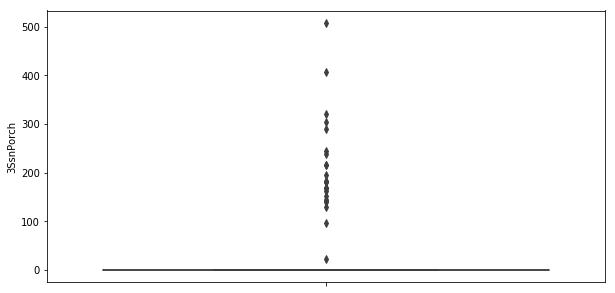

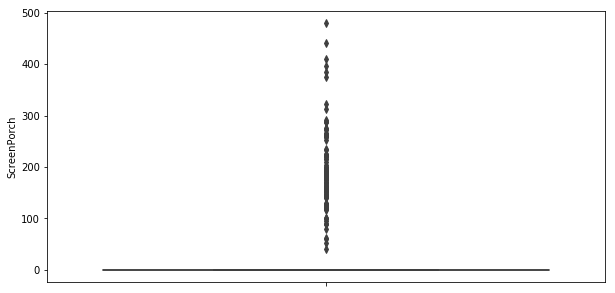

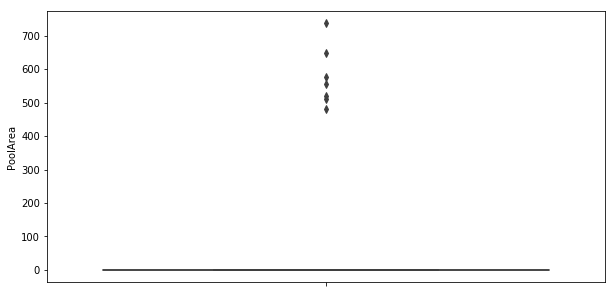

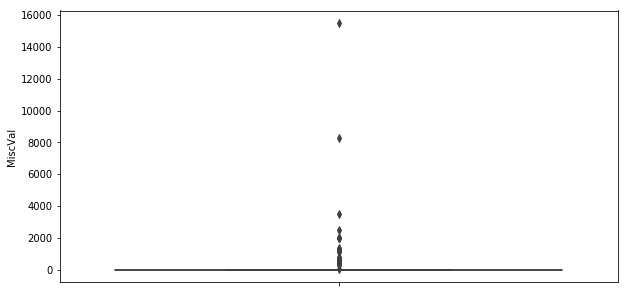

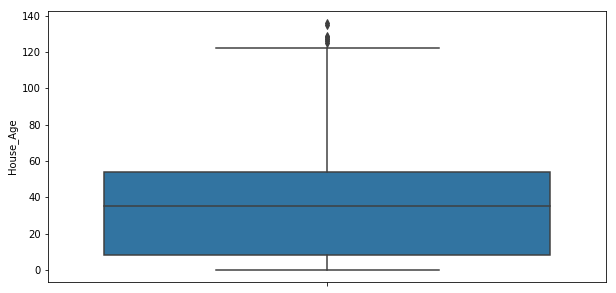

In [33]:
# Lets plot scatter plots of numeric data
for num_col in list(housing_dataset._get_numeric_data().columns):
    if num_col not in ["SalePrice_log"]:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=num_col, data=housing_dataset, orient="v")
        plt.show()

In [34]:
## By looking at the plots, looks like'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'ScreenPorch', 'MiscVal' column(s) 
## contains outliers.
## So, doing statistically outlier treatment on these column
print("Shape before outlier treatment ", housing_dataset.shape)

# 'LotArea' column treatment outlier
Q1 = housing_dataset.LotArea.quantile(0.05)
Q3 = housing_dataset.LotArea.quantile(0.95)
IQR = Q3 - Q1
housing_dataset = housing_dataset[(housing_dataset.LotArea >= Q1 - 1.5*IQR) & (housing_dataset.LotArea <= Q3 + 1.5*IQR)]

# 'MasVnrArea' column treatment outlier
Q1 = housing_dataset["MasVnrArea"].quantile(0.05)
Q3 = housing_dataset["MasVnrArea"].quantile(0.95)
IQR = Q3 - Q1
housing_dataset = housing_dataset[(housing_dataset["MasVnrArea"] >= Q1 - 1.5*IQR) & (housing_dataset["MasVnrArea"] <= Q3 + 1.5*IQR)]

# 'BsmtFinSF2' column treatment outlier
Q1 = housing_dataset["BsmtFinSF2"].quantile(0.05)
Q3 = housing_dataset["BsmtFinSF2"].quantile(0.95)
IQR = Q3 - Q1
housing_dataset = housing_dataset[(housing_dataset["BsmtFinSF2"] >= Q1 - 1.5*IQR) & (housing_dataset["BsmtFinSF2"] <= Q3 + 1.5*IQR)]

# 'ScreenPorch' column treatment outlier
Q1 = housing_dataset["ScreenPorch"].quantile(0.05)
Q3 = housing_dataset["ScreenPorch"].quantile(0.95)
IQR = Q3 - Q1
housing_dataset = housing_dataset[(housing_dataset["ScreenPorch"] >= Q1 - 1.5*IQR) & (housing_dataset["ScreenPorch"] <= Q3 + 1.5*IQR)]

# 'MiscVal' column treatment outlier
Q1 = housing_dataset["MiscVal"].quantile(0.05)
Q3 = housing_dataset["MiscVal"].quantile(0.95)
IQR = Q3 - Q1
housing_dataset = housing_dataset[(housing_dataset["MiscVal"] >= Q1 - 1.5*IQR) & (housing_dataset["MiscVal"] <= Q3 + 1.5*IQR)]

print("Shape after outlier treatment ", housing_dataset.shape)

Shape before outlier treatment  (1460, 73)
Shape after outlier treatment  (1380, 73)


### Dummy variable creation

In [35]:
# Putting feature variable to X
X = housing_dataset.drop(['SalePrice_log'], axis=1)
# Storing X for later subjective questions
X_sub = X.copy()
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Whether_House_was_modified,House_Age,Garage_Age
0,60,RL,65.0,8450,No_Alley_Access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,No_Fence,No_MiscFeature,0,2,WD,Normal,No,5,Less then or equal to 5 years
1,20,RL,80.0,9600,No_Alley_Access,Reg,Lvl,FR2,Gtl,Veenker,...,0,No_Fence,No_MiscFeature,0,5,WD,Normal,No,31,More then 5 years
2,60,RL,68.0,11250,No_Alley_Access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,No_Fence,No_MiscFeature,0,9,WD,Normal,Yes,7,More then 5 years
3,70,RL,60.0,9550,No_Alley_Access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,No_Fence,No_MiscFeature,0,2,WD,Abnorml,Yes,91,More then 5 years
4,60,RL,84.0,14260,No_Alley_Access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,No_Fence,No_MiscFeature,0,12,WD,Normal,No,8,More then 5 years


In [36]:
# Putting response variable to y
y = housing_dataset['SalePrice_log']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_log, dtype: float64

In [37]:
## Lets re-calculate final categorically variables level
all_columns = X.columns
numeric_cols = list(X._get_numeric_data().columns)
categorical_cols = list(set(all_columns) - set(numeric_cols))
X[categorical_cols].nunique()

BldgType                       5
Exterior2nd                   16
BsmtQual                       5
BsmtCond                       5
ExterQual                      4
MiscFeature                    3
MasVnrType                     4
GarageType                     7
MSSubClass                    15
Foundation                     6
LotConfig                      5
Condition1                     9
LandSlope                      3
BsmtExposure                   5
HouseStyle                     8
GarageFinish                   4
Functional                     7
SaleCondition                  6
BsmtFinType1                   7
Electrical                     5
Neighborhood                  25
SaleType                       9
Garage_Age                     3
ExterCond                      4
Alley                          3
HeatingQC                      5
PavedDrive                     3
Fence                          5
Whether_House_was_modified     2
LotShape                       4
Exterior1s

In [38]:
# Subset all categorical variables
data_categorical = X[categorical_cols].copy()
data_categorical.head()

,BldgType,Exterior2nd,BsmtQual,BsmtCond,ExterQual,MiscFeature,MasVnrType,GarageType,MSSubClass,Foundation,...,MoSold,MSZoning,FireplaceQu,BsmtFinType2,CentralAir,KitchenQual,GarageQual,GarageCond,RoofStyle,LandContour
0,1Fam,VinylSd,Gd,TA,Gd,No_MiscFeature,BrkFace,Attchd,60,PConc,...,2,RL,No_Fireplace,Unf,Y,Gd,TA,TA,Gable,Lvl
1,1Fam,MetalSd,Gd,TA,TA,No_MiscFeature,None,Attchd,20,CBlock,...,5,RL,TA,Unf,Y,TA,TA,TA,Gable,Lvl
2,1Fam,VinylSd,Gd,TA,Gd,No_MiscFeature,BrkFace,Attchd,60,PConc,...,9,RL,TA,Unf,Y,Gd,TA,TA,Gable,Lvl
3,1Fam,Wd Shng,TA,Gd,TA,No_MiscFeature,None,Detchd,70,BrkTil,...,2,RL,Gd,Unf,Y,Gd,TA,TA,Gable,Lvl
4,1Fam,VinylSd,Gd,TA,Gd,No_MiscFeature,BrkFace,Attchd,60,PConc,...,12,RL,TA,Unf,Y,Gd,TA,TA,Gable,Lvl


In [39]:
# Convert into dummies for filtered categorical
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,...,GarageCond_Po,GarageCond_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [40]:
# Drop categorical variable columns
X = X.drop(list(data_categorical.columns), axis=1)

In [41]:
# Concatenate dummy variables with housing_dataset
X = pd.concat([X, data_dummies], axis=1)
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond_Po,GarageCond_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,0,1,1,0,0,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,1,1,0,0,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,1,1,0,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0,1,1,0,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,1,1,0,0,0,0,0,0,1


### 4. Test-Train Split and Feature Scaling

In [42]:
# Visualising data before test-train split
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond_Po,GarageCond_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,0,1,1,0,0,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,1,1,0,0,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,1,1,0,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0,1,1,0,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,1,1,0,0,0,0,0,0,1


In [43]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
## Applying Feature Scaling

from sklearn.preprocessing import StandardScaler
# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

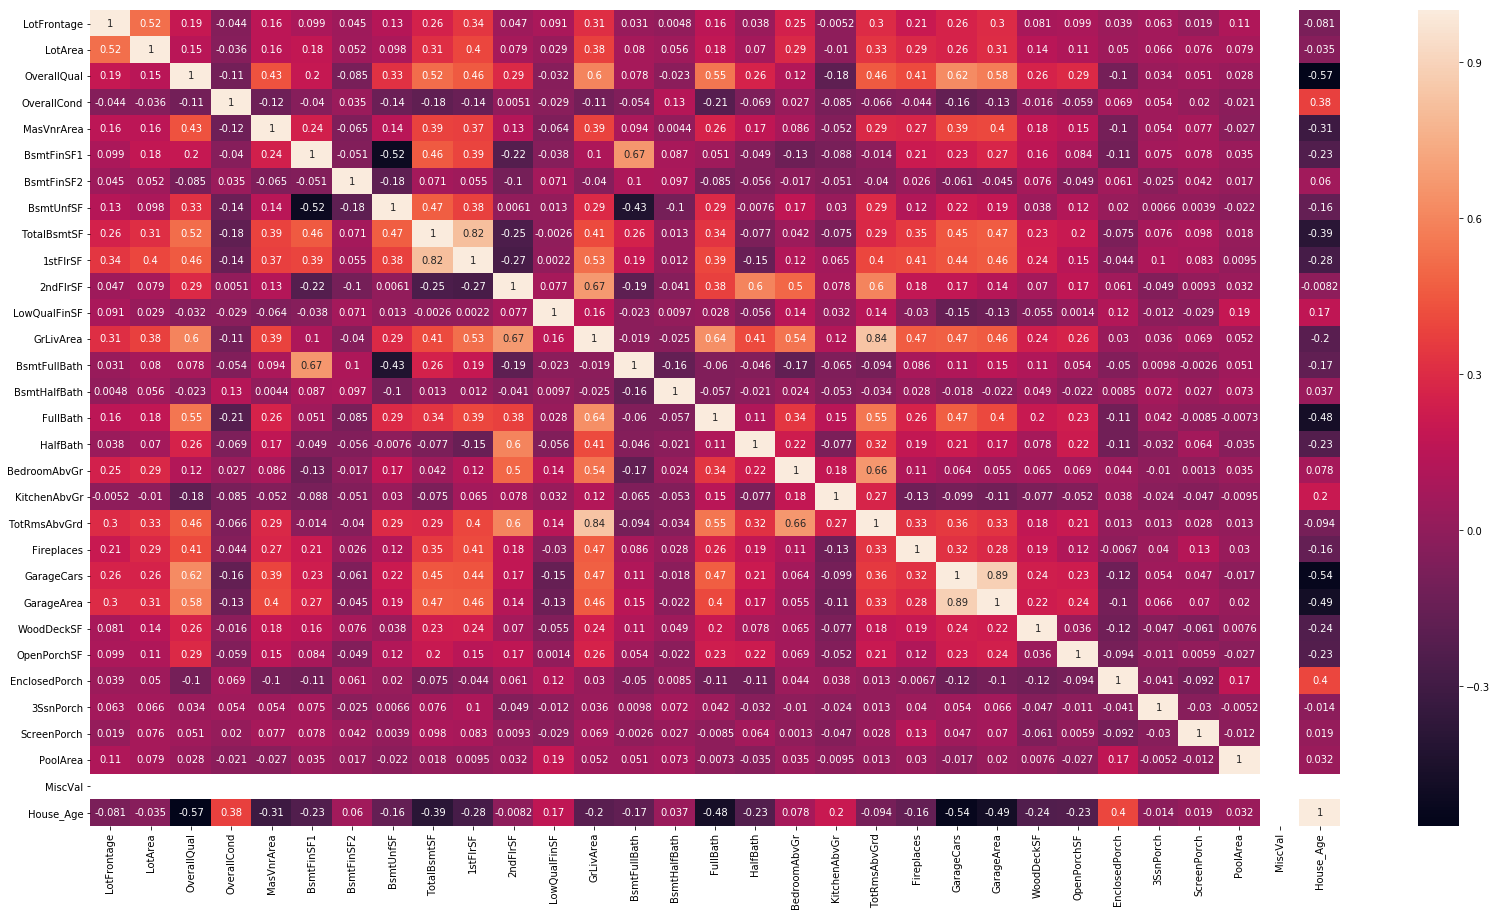

In [45]:
# Checking the correlation matrix
plt.figure(figsize=(28,15))
sns.heatmap(X_train[numeric_cols].corr(), annot=True)

### 5. Model building and evaluation

### Ridge and Lasso Regression

Let's now try predicting house prices, by performing ridge and lasso regression.

In [46]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os

# list of alphas to tune
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016923,0.019518,0.003125,0.006249,1e-05,{'alpha': 1e-05},-0.091632,-0.084391,-0.098428,-0.083298,...,-0.090025,0.005581,27,-0.057315,-0.059079,-0.054842,-0.058652,-0.057632,-0.057504,0.001479
1,0.007551,0.007007,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.091626,-0.084391,-0.098425,-0.083296,...,-0.090021,0.005579,26,-0.057315,-0.059079,-0.054842,-0.058652,-0.057632,-0.057504,0.001479
2,0.010834,0.009353,0.000599,0.000798,0.001,{'alpha': 0.001},-0.091564,-0.084386,-0.098391,-0.083275,...,-0.089982,0.005565,25,-0.057317,-0.059078,-0.054847,-0.058654,-0.057635,-0.057506,0.001477
3,0.014362,0.002647,0.002194,0.000400,0.01,{'alpha': 0.01},-0.091049,-0.084336,-0.098067,-0.083078,...,-0.089618,0.005438,24,-0.057341,-0.059077,-0.054898,-0.058679,-0.057663,-0.057532,0.001463
4,0.009973,0.000001,0.001596,0.000488,0.05,{'alpha': 0.05},-0.089581,-0.084083,-0.097028,-0.082304,...,-0.088441,0.005143,23,-0.057450,-0.059133,-0.055120,-0.058797,-0.057861,-0.057672,0.001414


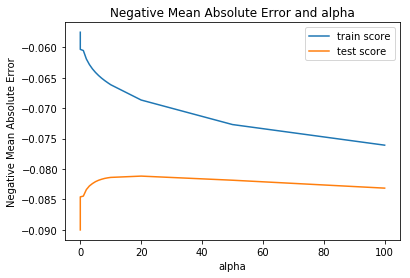

In [48]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [49]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.56084919e-03,  1.89862940e-02,  7.35579647e-02,  5.30747198e-02,
        4.03592015e-03,  3.13906826e-02,  5.39336729e-03,  6.82678427e-03,
        4.13106708e-02,  3.78602168e-02,  3.74982224e-02,  1.99093045e-03,
        6.18302826e-02,  1.31891710e-02, -2.12625569e-04,  2.04450530e-02,
        1.86230589e-02,  2.15734586e-03, -1.08768333e-02,  1.02598625e-02,
        2.27535196e-03,  2.29017291e-02,  1.49268154e-02,  1.06590591e-02,
       -6.00968813e-04,  7.15829224e-03,  7.21474795e-03,  1.13201526e-02,
        1.27924817e-03,  0.00000000e+00, -6.10521244e-02,  7.74665990e-03,
       -4.61929522e-03, -3.95553883e-02, -9.41985718e-03, -3.15354025e-03,
        1.18584107e-02, -3.38563728e-02, -9.03233056e-03,  7.09173473e-03,
        3.98740703e-05,  8.74601896e-03,  2.87416408e-03, -2.02489072e-03,
       -4.22982809e-03, -1.27049311e-02, -3.14838592e-03,  1.34822722e-02,
        2.83803674e-02,  3.97021756e-04, -6.31273825e-03, -3.38517708e-02,
       -3.34036664e-03, -

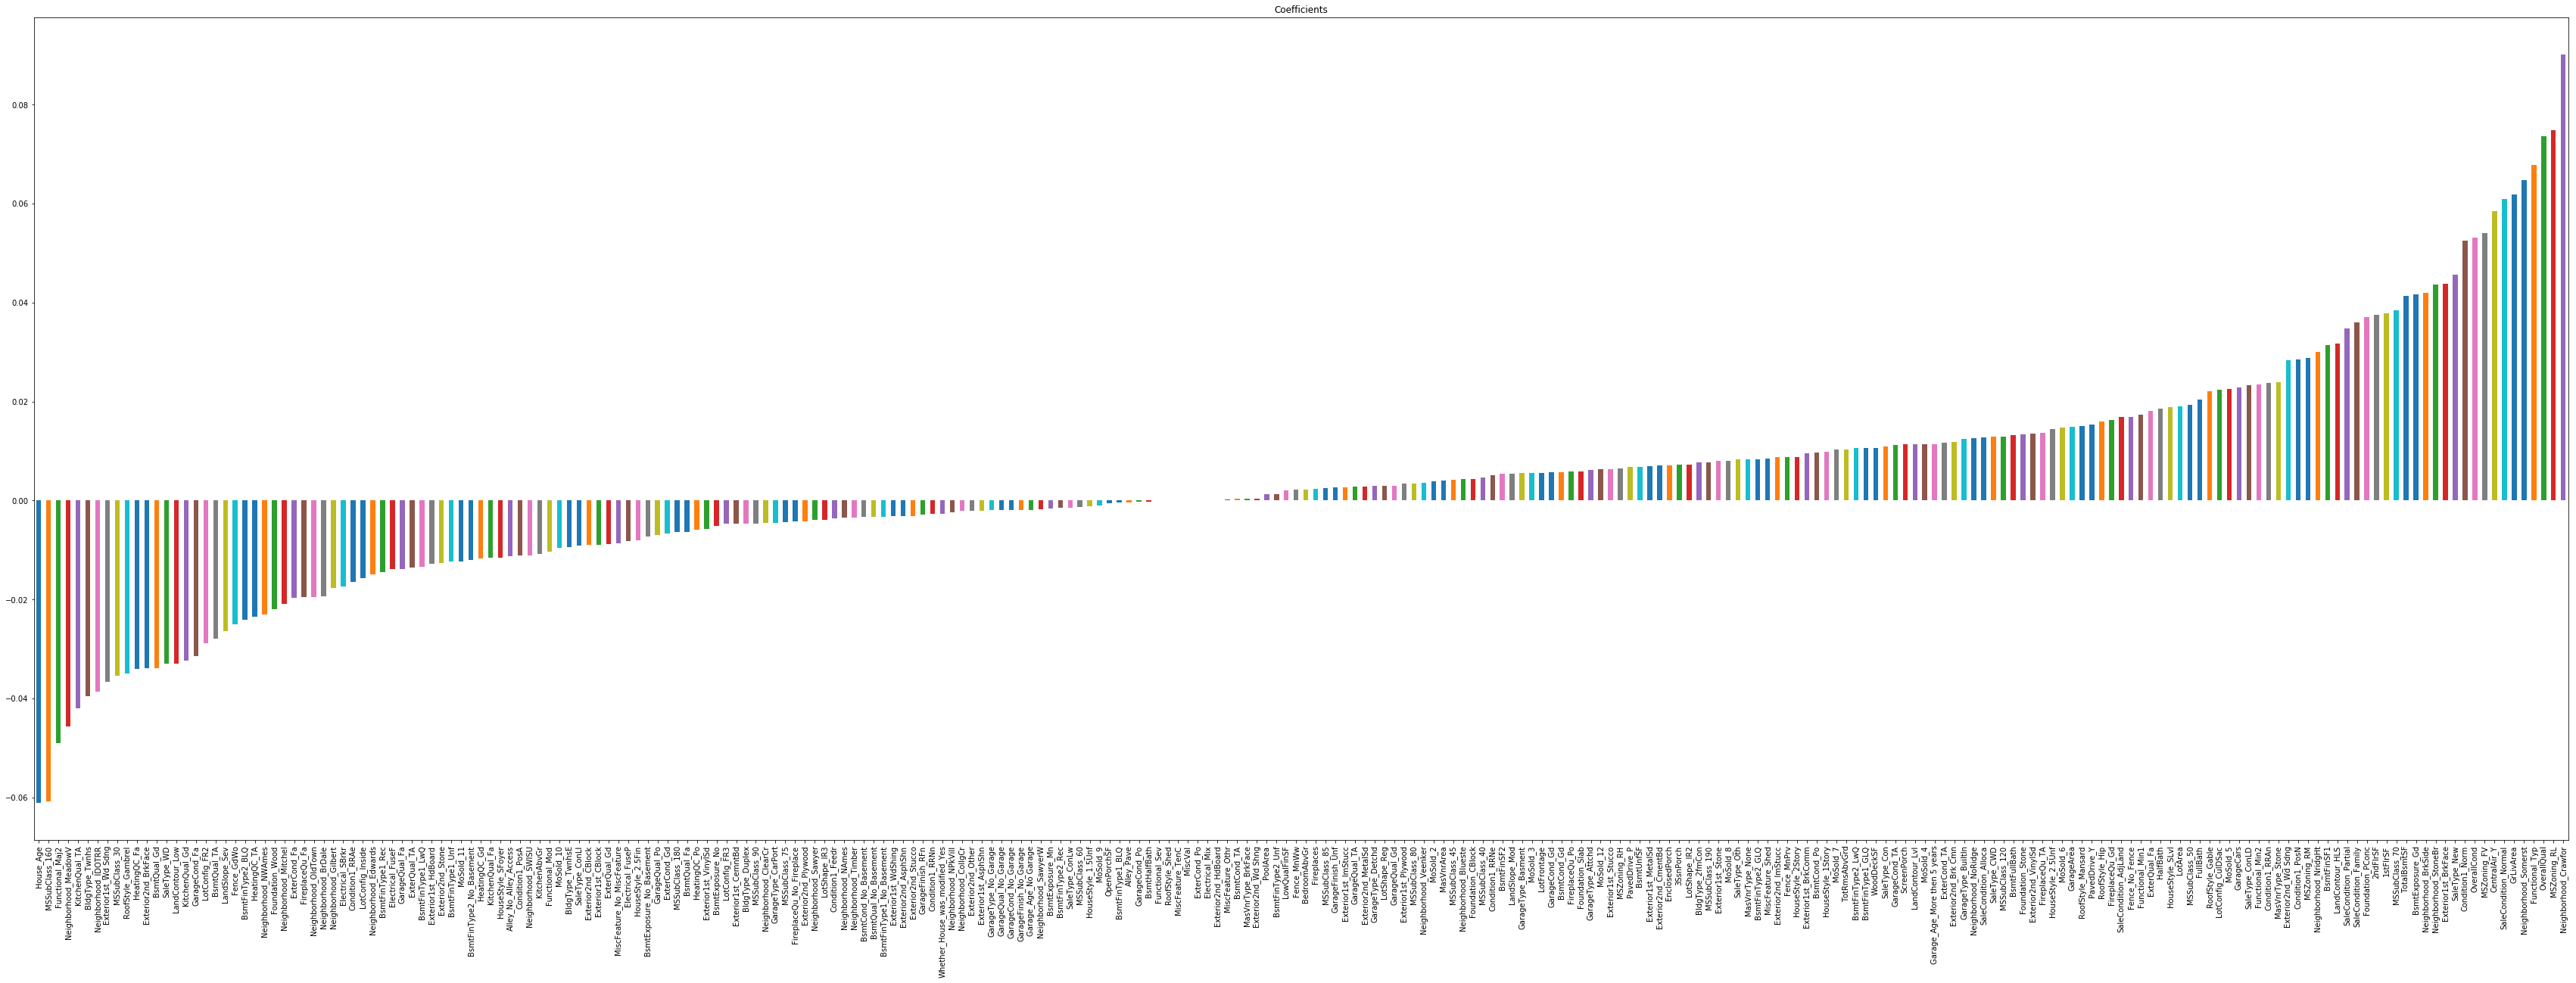

In [50]:
from pandas import Series
plt.figure(figsize=(60,20))
coef = Series(ridge.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Coefficients')
plt.show()

### Lasso

In [51]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.01]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.178778,0.020902,0.001196,0.000746,1e-05,{'alpha': 1e-05},-0.089287,-0.084738,-0.096768,-0.082465,...,-0.088785,0.004977,3,-0.057450,-0.059237,-0.055188,-0.058965,-0.057879,-0.057744,0.001439
1,0.135426,0.007647,0.001396,0.000798,0.0001,{'alpha': 0.0001},-0.081776,-0.079916,-0.092570,-0.076235,...,-0.082749,0.005442,2,-0.059921,-0.061716,-0.058426,-0.061967,-0.061140,-0.060634,0.001310
2,0.027127,0.002631,0.001396,0.000489,0.001,{'alpha': 0.001},-0.078239,-0.083227,-0.085096,-0.076344,...,-0.080772,0.003187,1,-0.072872,-0.071938,-0.069729,-0.073613,-0.072317,-0.072094,0.001310
3,0.010574,0.000487,0.001395,0.000490,0.01,{'alpha': 0.01},-0.095477,-0.094058,-0.096112,-0.086665,...,-0.092288,0.003729,4,-0.088469,-0.089405,-0.088909,-0.091292,-0.090728,-0.089760,0.001077


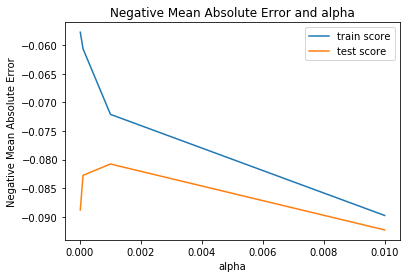

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [54]:
alpha = 0.001

lasso = Lasso(alpha=alpha, max_iter=50000)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
lasso.coef_

array([ 0.00577619,  0.01638606,  0.08827252,  0.05409169,  0.00014744,
        0.02831259,  0.00270547, -0.        ,  0.04832365,  0.00191034,
        0.        , -0.00380265,  0.12096084,  0.01285909, -0.        ,
        0.01095558,  0.01293887, -0.        , -0.01186889,  0.00657368,
        0.00649103,  0.02623912,  0.01701048,  0.00900752,  0.        ,
        0.00504902,  0.0056038 ,  0.00976002,  0.        ,  0.        ,
       -0.06546846,  0.        , -0.        , -0.01886103,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.00330257, -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.02397591,  0.        , -0.01753841,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.0018382 ,  0.        ,  0.01175233,  0.        ,  0.  

Text(0.5, 0, 'Errors')

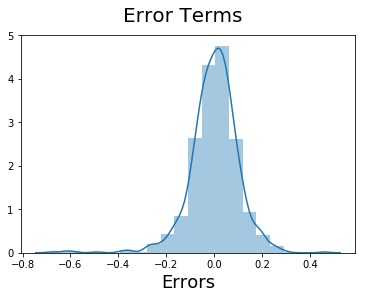

In [56]:
"""
Lets see if the error terms are normalized.
"""
y_pred_lasso = lasso.predict(X_train)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [57]:
# run prediction on the initial train set for Lasso Regression to get a rough idea of how well it does
from sklearn.metrics import r2_score
print("Lasso score on training set: ", r2_score(y_train, y_pred_lasso))

Lasso score on training set:  0.9319771835609287


Text(0.5, 0, 'Errors')

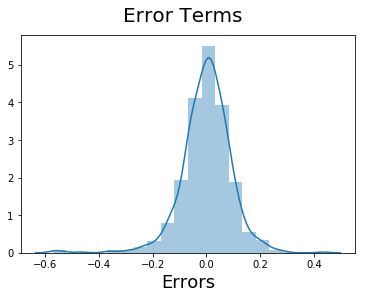

In [58]:
"""
Lets see if the error terms are normalized.
"""
y_pred_ridge = ridge.predict(X_train)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_ridge), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [59]:
# Error terms are normalized for both Lasso, and Ridge regression
# run prediction on the initial train set for Ridge Regression to get a rough idea of how well it does
print("Ridge score on training set: ", r2_score(y_train, y_pred_ridge))

Ridge score on training set:  0.9428280768591525


#### Ridge Regression is able to explain 94% of the variance in the train data set, while Lasso Regression is only able to explain 93% of the variance. But Ridge did not do feature selection, and has used all of the variables provided in the dataset to create the model. Lasso Regression however did feature selection, and even after that was able to explain 93% of the variance. Since simpler model with approx. same accuracy is better, we would choose Lasso Regression for our final model.

### Making predictions using the final model

In [60]:
# Lets check the coefficients of all the columns determined by Lasso
list(zip(range(0, 400), X_train.columns, lasso.coef_))

[(0, 'LotFrontage', 0.005776187880924956),
 (1, 'LotArea', 0.016386063209462415),
 (2, 'OverallQual', 0.08827251711700103),
 (3, 'OverallCond', 0.054091688067683226),
 (4, 'MasVnrArea', 0.00014744451054061653),
 (5, 'BsmtFinSF1', 0.02831259247318742),
 (6, 'BsmtFinSF2', 0.002705465391555578),
 (7, 'BsmtUnfSF', -0.0),
 (8, 'TotalBsmtSF', 0.04832365480237868),
 (9, '1stFlrSF', 0.0019103354776251842),
 (10, '2ndFlrSF', 0.0),
 (11, 'LowQualFinSF', -0.003802647939226295),
 (12, 'GrLivArea', 0.12096083605037987),
 (13, 'BsmtFullBath', 0.012859085341058589),
 (14, 'BsmtHalfBath', -0.0),
 (15, 'FullBath', 0.010955578941965078),
 (16, 'HalfBath', 0.012938867018864715),
 (17, 'BedroomAbvGr', -0.0),
 (18, 'KitchenAbvGr', -0.011868887379181733),
 (19, 'TotRmsAbvGrd', 0.006573677995900069),
 (20, 'Fireplaces', 0.0064910344785867715),
 (21, 'GarageCars', 0.026239122951870277),
 (22, 'GarageArea', 0.017010476636206327),
 (23, 'WoodDeckSF', 0.009007517378617678),
 (24, 'OpenPorchSF', 0.0),
 (25, 'Encl

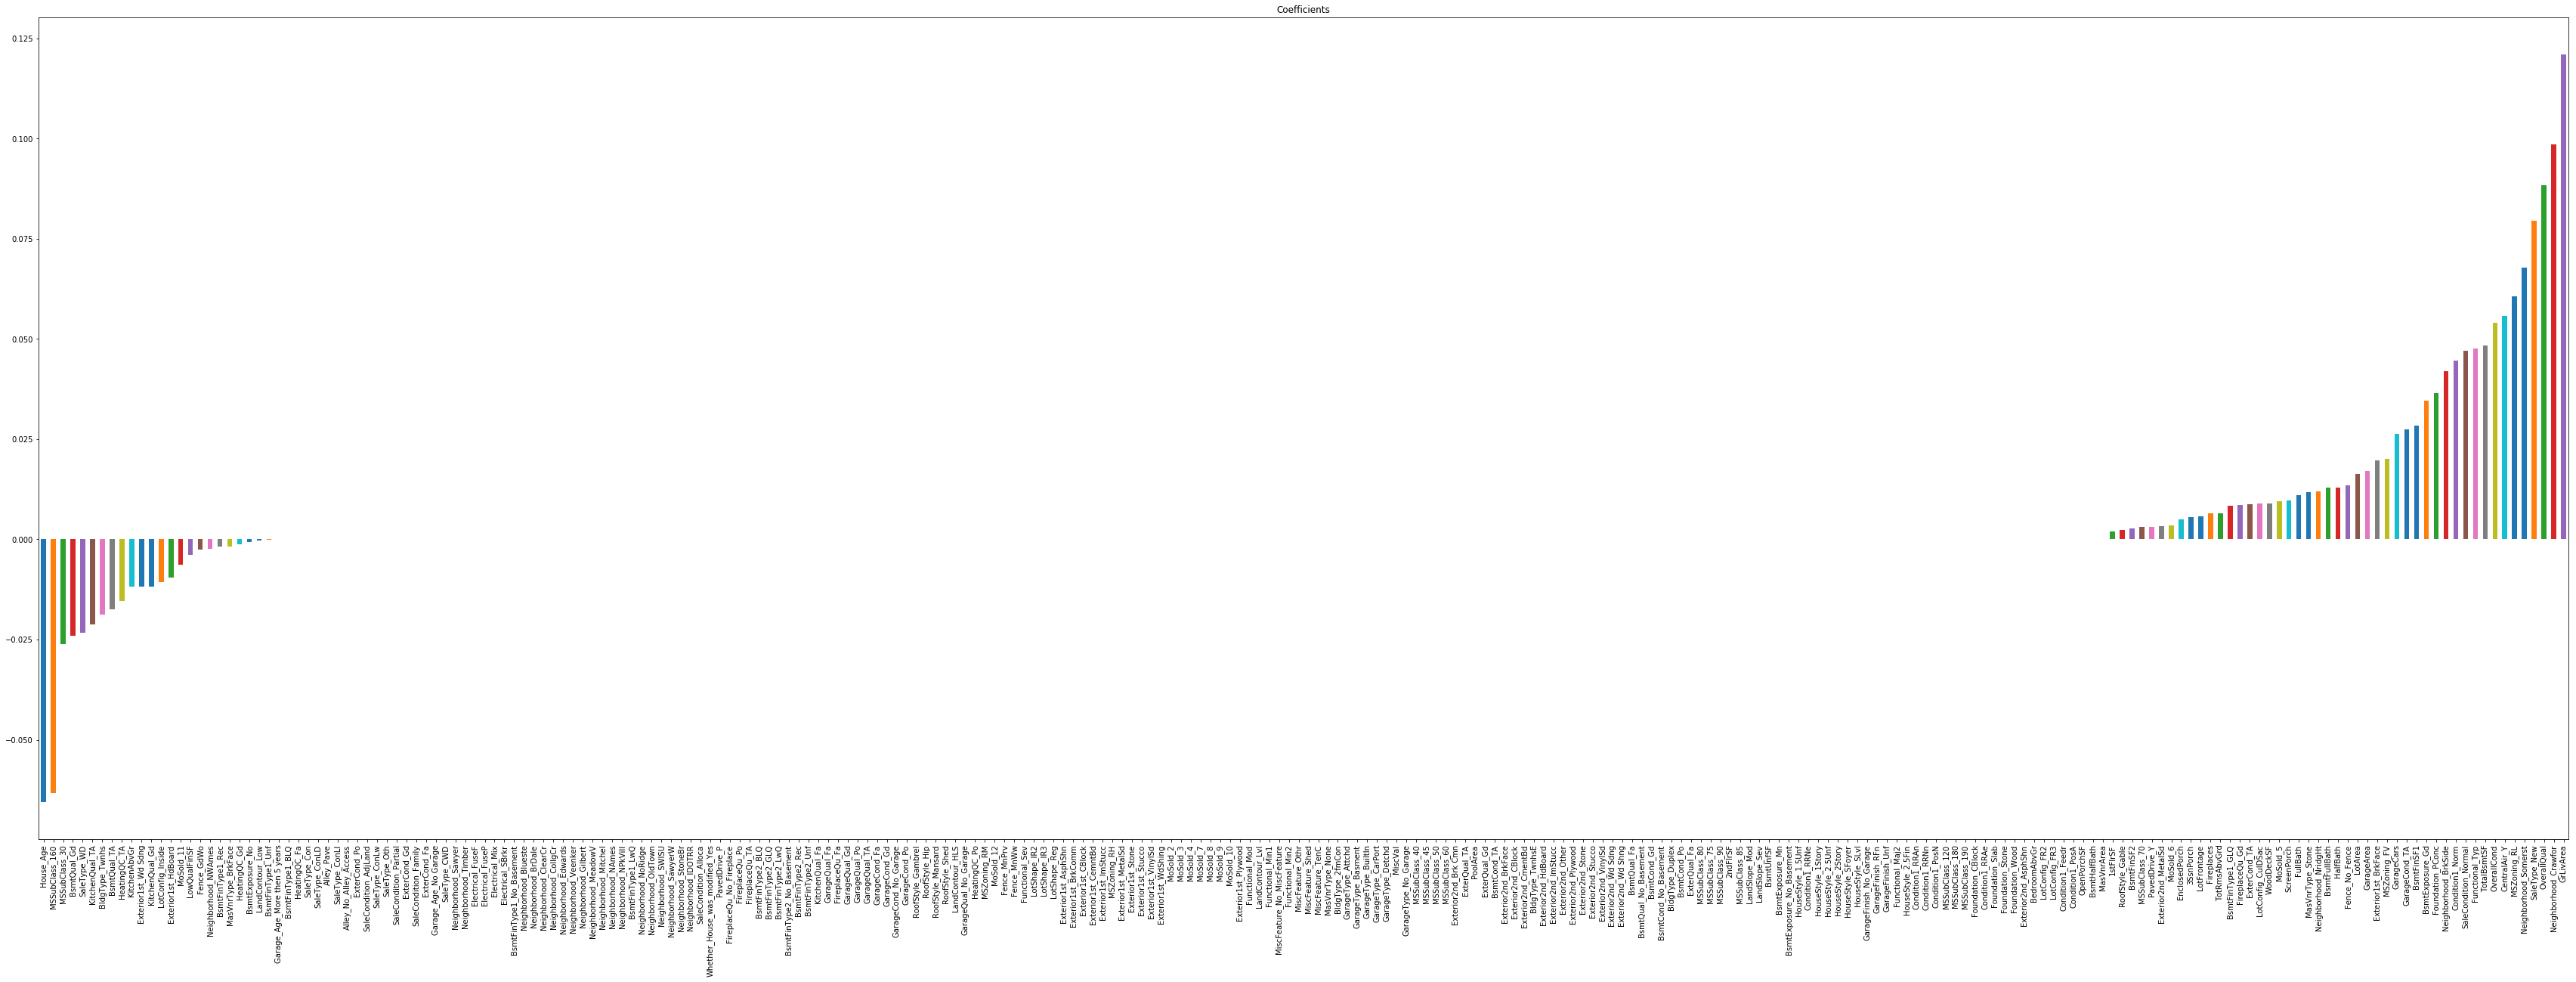

In [61]:
from pandas import Series
plt.figure(figsize=(60,20))
coef = Series(lasso.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Coefficients')
plt.show()

### Below are top 19 variables that are significant in predicting the house price as company wants to know the same

In [62]:
# Created a dataframe of the variables selected so that we can perform dataframe operations on it
# We created a Magnitude_coefficient column as we want to check which coefficients affect the house prices
# irrespective of their signs
coeff_df = pd.DataFrame({'Column':coef.index, 'Coefficient':coef.values})
coeff_df["Magnitude_Coefficient"] = coeff_df["Coefficient"].abs()
coeff_df.sort_values(by="Magnitude_Coefficient", ascending=False).head(19)

,Column,Coefficient,Magnitude_Coefficient
257,GrLivArea,0.120961,0.120961
256,Neighborhood_Crawfor,0.098468,0.098468
255,OverallQual,0.088273,0.088273
254,SaleType_New,0.079555,0.079555
253,Neighborhood_Somerst,0.067829,0.067829
0,House_Age,-0.065468,0.065468
1,MSSubClass_160,-0.063290,0.063290
252,MSZoning_RL,0.060668,0.060668
251,CentralAir_Y,0.055714,0.055714
250,OverallCond,0.054092,0.054092


In [1]:
## As seen from the top features, there are some features which helps to increase the house sale price, while there are
## other features which decrease the house sale price. Such features can be identified using the 'Coefficient' value of the
## above dataframe.
## E.g.
## GrLivArea - The higher it is, the more is the sale price of the house.
## House Age - Higher the age of the house, lower is the sale price of the house.
## Such variables can be identified from above dataframe and communicated to business team so that they can analyze.

In [63]:
'''
We have verified the normality of the error terms. Applying scaling on test data set too
'''
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond_Po,GarageCond_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,LandContour_HLS,LandContour_Low,LandContour_Lvl
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,-0.027859,0.006113,0.050654,-0.018986,-0.011675,-0.014307,0.022494,-0.032145,-0.041757,0.009550,...,0.004831,0.915459,0.794686,0.012077,0.178744,0.002415,0.002415,0.038647,0.024155,0.888889
std,0.926588,0.888825,0.929263,0.950118,0.921390,1.029543,1.042556,1.021681,0.972586,0.977062,...,0.069421,0.278534,0.404420,0.109363,0.383601,0.049147,0.049147,0.192986,0.153715,0.314650
min,-2.253678,-1.937335,-2.909850,-3.179276,-0.590275,-1.018900,-0.284752,-1.312739,-2.538951,-1.695515,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.456612,-0.459417,-0.769602,-0.503693,-0.590275,-1.018900,-0.284752,-0.860681,-0.677478,-0.731296,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.006476,-0.023799,-0.056186,-0.503693,-0.590275,-0.214697,-0.284752,-0.216739,-0.152417,-0.152229,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.372803,0.405767,0.657230,0.388167,0.424251,0.698213,-0.284752,0.453164,0.523608,0.693636,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.164978,5.247186,2.797478,3.063750,5.070171,4.096205,6.503047,2.992250,3.225300,4.664855,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# Lets apply Lasso on test set for the variables selected by it in Training set
features_selected_by_Lasso = list(coeff_df.loc[coeff_df["Magnitude_Coefficient"]>0,:]["Column"].values)
X_test_selected = X_test[features_selected_by_Lasso]
X_test_selected.head()

,House_Age,MSSubClass_160,MSSubClass_30,BsmtQual_Gd,SaleType_WD,KitchenQual_TA,BldgType_Twnhs,BsmtQual_TA,HeatingQC_TA,KitchenAbvGr,...,Functional_Typ,TotalBsmtSF,OverallCond,CentralAir_Y,MSZoning_RL,Neighborhood_Somerst,SaleType_New,OverallQual,Neighborhood_Crawfor,GrLivArea
276,-0.954177,0,0,0,1,0,0,0,0,-0.20982,...,1,1.214067,-0.503693,1,1,0,0,0.657230,0,0.130832
34,-1.118274,0,0,0,1,0,0,0,0,-0.20982,...,1,1.216473,-0.503693,1,1,0,0,2.084062,0,0.132877
673,0.457057,0,0,0,1,0,0,1,0,-0.20982,...,1,1.014387,1.280028,1,1,0,0,-0.056186,1,0.701555
628,0.063224,0,0,1,1,0,0,0,1,-0.20982,...,1,-0.036939,-0.503693,1,1,0,0,-0.769602,0,1.194546
1133,-0.724441,0,0,1,1,0,0,0,0,-0.20982,...,1,0.174769,-0.503693,1,1,0,0,1.370646,0,1.071810


In [65]:
# Predicting using Lasso on Test set
y_test_lasso = lasso.predict(X_test)
print("R2 score on test set using Lasso : ", r2_score(y_test, y_test_lasso))

R2 score on test set using Lasso :  0.9114188474072936


Text(0, 0.5, 'Predicted House Price')

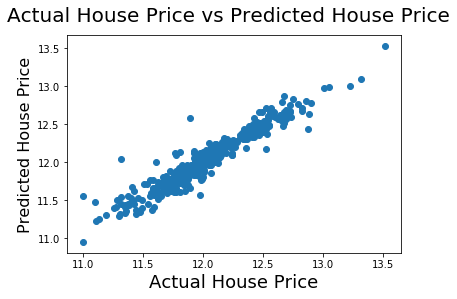

In [66]:
# Model evaluation : Plotting y_test_lasso and y_test to understand the predicted values

fig = plt.figure()
plt.scatter(y_test, y_test_lasso)
fig.suptitle('Actual House Price vs Predicted House Price', fontsize = 20)              # Plot heading 
plt.xlabel('Actual House Price', fontsize = 18)                          # X-label
plt.ylabel('Predicted House Price', fontsize = 16)   

### Lets check out how well selected top 19 variables describe the price of a house using Linear Regression

In [67]:
# Lets build Linear model on the selected top 19 variables
# Adding a constant variable
import statsmodels.api as sm
major_features_selected_by_Lasso = list(coeff_df.loc[coeff_df["Magnitude_Coefficient"]>0.027,:]["Column"].values)
X_train_selected_sm = sm.add_constant(X_train[major_features_selected_by_Lasso])
lm=sm.OLS(y_train, X_train_selected_sm).fit()
# Checking the summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     557.6
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:19:11   Log-Likelihood:                 736.63
No. Observations:                 965   AIC:                            -1433.
Df Residuals:                     945   BIC:                            -1336.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5610      0.032    362.508      0.000      11.498      11.624
House_Age               -0.0761      0.007    -11.006      0.000      -0.090      -0.063
MSSubClass_160          -0.1370      0.020     -6.748      0.000      -0.177      -0.097
GarageCond_TA            0.0993      0.014      7.138      0.000       0.072       0.127
BsmtFinSF1               0.0412      0.004      9.496      0.000       0.033       0.050
BsmtExposure_Gd          0.0824      0.014      5.908      0.000       0.055       0.110
Foundation_PConc         0.0529      0.011      4.865      0.000       0.032       0.074
Neighborhood_BrkSide     0.0707      0.019      3.637      0.000       0.033       0.109
Condition1_Norm          0.0524      0.011      4.666      0.000       0.030       0.074
SaleCondition_Normal     0.0740      0.012      5.923      0.000       0.049       0.098
Functional_Typ           0.0705      0.017      4.094      0.000       0.037       0.104
TotalBsmtSF              0.0493      0.005      9.696      0.000       0.039       0.059
OverallCond              0.0545      0.004     12.372      0.000       0.046       0.063
CentralAir_Y             0.0727      0.017      4.246      0.000       0.039       0.106
MSZoning_RL              0.0940      0.011      8.391      0.000       0.072       0.116
Neighborhood_Somerst     0.1323      0.018      7.254      0.000       0.096       0.168
SaleType_New             0.1659      0.019      8.769      0.000       0.129       0.203
OverallQual              0.0993      0.006     15.574      0.000       0.087       0.112
Neighborhood_Crawfor     0.1269      0.019      6.543      0.000       0.089       0.165
GrLivArea                0.1595      0.005     31.748      0.000       0.150       0.169
==============================================================================
Omnibus:                      135.241   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.978
Skew:                          -0.572   Prob(JB):                    7.04e-132
Kurtosis:                       6.703   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# As all of the variables have p-value equal to 0, which means they are important.
# Lets calculate VIF too for the selected features
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creating a dataframe of all feature variables and their VIFs
house_prices_vif = pd.DataFrame()
house_prices_vif['Features'] = X_train_selected_sm.columns
house_prices_vif['VIF'] = [variance_inflation_factor(X_train_selected_sm.values, i) for i in 
                         range(X_train_selected_sm.shape[1])]
house_prices_vif['VIF'] = round(house_prices_vif['VIF'], 2)
house_prices_vif = house_prices_vif.sort_values(by = "VIF", ascending = False)
house_prices_vif

,Features,VIF
0,const,75.56
1,House_Age,3.55
17,OverallQual,3.02
6,Foundation_PConc,2.18
16,SaleType_New,2.02
11,TotalBsmtSF,1.92
19,GrLivArea,1.88
9,SaleCondition_Normal,1.74
14,MSZoning_RL,1.59
12,OverallCond,1.44


In [69]:
#VIF values also looks good
X_test_selected = X_test[major_features_selected_by_Lasso]

# Adding constant variable to test dataframe
X_test_selected_sm = sm.add_constant(X_test_selected)
# Making predictions
y_test_sm_pred = lm.predict(X_test_selected_sm)
print("Linear Regression score on test set using just 19 columns: ", r2_score(y_test, y_test_sm_pred))

Linear Regression score on test set using just 19 columns:  0.8912209317527756


### Linear Regression has adjusted r2 value of 91% on train set, and has value of 89% on test set using the top 19 variables selected by Lasso Regression, which is very good.

### Now Perfoming some operations on the Lasso, and Ridge regression models based on subjective questions

In [70]:

# Lets calculate the error term of both Lasso and Ridge

from sklearn.metrics import mean_squared_error

ridge_alpha = 10
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_train)
print("R2 score on training set for ridge: ", r2_score(y_train, y_pred_ridge))
ridge_rms = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print("ridge_rms value : ", ridge_rms)

lasso_alpha = 0.001
lasso = Lasso(alpha=lasso_alpha)        
lasso.fit(X_train, y_train) 
y_pred_lasso = lasso.predict(X_train)
print("R2 score on training set for lasso: ", r2_score(y_train, y_pred_lasso))
lasso_rms = np.sqrt(mean_squared_error(y_train, y_pred_lasso))
print("lasso_rms value : ", lasso_rms)

print("\n########################################################\n")

# Lets double the optimal alpha, and calculate the error term(s) again
ridge_alpha = 20
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_train)
print("R2 score on training set for ridge after doubling alpha: ", r2_score(y_train, y_pred_ridge))
ridge_rms = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print("ridge_rms value after doubling alpha : ", ridge_rms)

lasso_alpha = 0.002
lasso = Lasso(alpha=lasso_alpha)        
lasso.fit(X_train, y_train) 
y_pred_lasso = lasso.predict(X_train)
print("R2 score on training set for lasso after doubling alpha: ", r2_score(y_train, y_pred_lasso))
lasso_rms = np.sqrt(mean_squared_error(y_train, y_pred_lasso))
print("lasso_rms value after doubling alpha : ", lasso_rms)


R2 score on training set for ridge:  0.9428280768591525
ridge_rms value :  0.09423265072336377
R2 score on training set for lasso:  0.9319771835609287
lasso_rms value :  0.10278679204485003

########################################################

R2 score on training set for ridge after doubling alpha:  0.9387597849776403
ridge_rms value after doubling alpha :  0.09752778495391733
R2 score on training set for lasso after doubling alpha:  0.9228291968959013
lasso_rms value after doubling alpha :  0.10948043571360015


In [71]:
# Hence found out that when alpha value is increased from threshold value, then the error value also increases
# Lets check the most important variables post increasing the value of alpha
coef = Series(lasso.coef_, X_train.columns).sort_values()
coeff_df = pd.DataFrame({'Column':coef.index, 'Coefficient':coef.values})
coeff_df["Magnitude_Coefficient"] = coeff_df["Coefficient"].abs()
coeff_df.sort_values(by="Magnitude_Coefficient", ascending=False).head(20)

,Column,Coefficient,Magnitude_Coefficient
257,GrLivArea,0.121300,0.121300
256,OverallQual,0.097102,0.097102
0,House_Age,-0.071678,0.071678
255,SaleType_New,0.065929,0.065929
254,Neighborhood_Crawfor,0.065382,0.065382
253,OverallCond,0.055513,0.055513
252,MSZoning_RL,0.051681,0.051681
251,Neighborhood_Somerst,0.050259,0.050259
250,TotalBsmtSF,0.047409,0.047409
1,MSSubClass_160,-0.039746,0.039746


In [72]:
# Lets remove top 5 features from our dataset, and then re-create the model to find out which would be next 5 imp features
# Top 5 features in original model are
# GrLivArea, Neighborhood, OverAllQual,SaleType_New, House_Age (Derived from YrSold and YearBuilt)
# Dataset before dummy variables were created
X_sub.drop(["GrLivArea", "Neighborhood", "OverallQual", "SaleType", "House_Age"], axis=1, inplace=True)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.2s finished


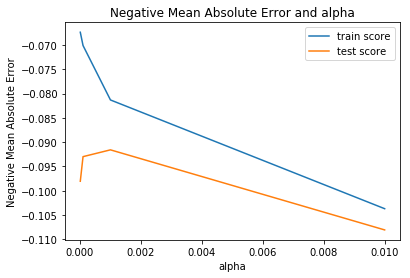

In [73]:
## Lets re-calculate final categorically variables level
all_columns = X_sub.columns
numeric_cols = list(X_sub._get_numeric_data().columns)
categorical_cols = list(set(all_columns) - set(numeric_cols))

# Subset all categorical variables
data_categorical = X_sub[categorical_cols].copy()

# Convert into dummies for filtered categorical
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
# Drop categorical variable columns
X_sub = X_sub.drop(list(data_categorical.columns), axis=1)
# Concatenate dummy variables with housing_dataset
X_sub = pd.concat([X_sub, data_dummies], axis=1)
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, train_size=0.7, test_size=0.3, random_state=100)

## Applying Feature Scaling

from sklearn.preprocessing import StandardScaler
# Create a scaling object
scaler = StandardScaler()
# Scale these variables using 'fit_transform'
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Lasso Model
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.01]

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# Choosing alpha based on the graph
alpha = 0.001
lasso = Lasso(alpha=alpha, max_iter=50000)
lasso.fit(X_train, y_train) 

y_pred_lasso = lasso.predict(X_train)
coef = Series(lasso.coef_, X_train.columns).sort_values()
# run prediction on the initial train set for Lasso Regression to get a rough idea of how well it does
from sklearn.metrics import r2_score
print("Lasso score on training set after removing top 5 variables is : ", r2_score(y_train, y_pred_lasso))

coeff_df = pd.DataFrame({'Column':coef.index, 'Coefficient':coef.values})
coeff_df["Magnitude_Coefficient"] = coeff_df["Coefficient"].abs()
coeff_df.sort_values(by="Magnitude_Coefficient", ascending=False).head(20)

Lasso score on training set after removing top 5 variables is :  0.9159314227927083


,Column,Coefficient,Magnitude_Coefficient
222,MSZoning_FV,0.116502,0.116502
221,2ndFlrSF,0.108346,0.108346
220,SaleCondition_Partial,0.104344,0.104344
219,CentralAir_Y,0.099476,0.099476
218,1stFlrSF,0.097246,0.097246
217,Functional_Typ,0.090977,0.090977
216,MSZoning_RL,0.072596,0.072596
215,TotalBsmtSF,0.068466,0.068466
214,Foundation_PConc,0.063679,0.063679
0,MSSubClass_30,-0.061220,0.061220


### End of Assignment